# Wykrywanie Zaburzeń Sygnału EKG

![ECG_anomaly_detection_intro.png](https://live.staticflickr.com/65535/54253200317_77c251c48c_o.png)

*Obraz wygenerowany przy użyciu modelu DALL-E.*

## Wstęp

Rozwój sztucznej inteligencji otwiera nowe możliwości w diagnostyce medycznej, zwłaszcza w analizie złożonych danych, takich jak [sygnały elektrokardiograficzne (EKG)](https://www.healio.com/cardiology/learn-the-heart/ecg-review/ecg-interpretation-tutorial). EKG to jedno z najczęściej stosowanych narzędzi diagnostycznych w medycynie, umożliwiające ocenę i wykrywanie nieprawidłowości pracy serca.

Tradycyjnie sygnał EKG powstaje z dwunastu odprowadzeń, jednak w tym zadaniu skupimy się na sygnale jednoodprowadzeniowym, czyli dysponujemy
jedną zmienną reprezentującą napięcie elektryczne generowane przez serce w czasie. Dane te są rejestrowane w postaci krzywej zależnej od czasu, czyli można tutaj mówić o szeregu czasowym. Z sygnału EKG można wydzielić charakterystyczne fragmenty, czyli **załamki** (ang. waves) P, Q, R, S, T oraz **odstępy** pomiędzy dwoma zdarzeniami w EKG (ang. intervals), spośród których istotną rolę odgrywa odstęp R-R (czas między wystąpieniem dwóch kolejnych załamków R). Oprócz tego mówimy o **odcinkach** (ang. segments), czyli długości między dwoma określonymi załamkami w EKG, pomiędzy którymi powinna występować bazowa amplituda sygnału. Z kolei **zespół** (ang. complex) stanowi kilka zgrupowanych załamków. Głównie wyróżniamy tutaj zespół QRS. Schematyczny rysunek EKG wraz z podpisanymi fragmentami, jest prezentowany poniżej.

![ECG.png](https://live.staticflickr.com/65535/54254099351_213d47784d_o.png)

W EKG pochodzącym od zdrowej osoby można zauważyć sekwencję PQRST. Na początku wyróżniamy załamek P, który reprezentuje skurcz przedsionków i jest małym pionowym wychyleniem przed zespołem QRS. Następnie, zespół QRS wskazuje na skurcz komór i tworzony jest przez trzy wygięcia: załamek Q, załamek R oraz załamek S. Dalej można zauważyć odcinek ST, czyli płaski odcinek między zespołem QRS a załamkiem T, który odpowiada wczesnej fazie repolaryzacji komór. Finalnie, załamek T, który jest zaokrąglonym, pionowym wychyleniem, dotyczy repolaryzacji komór i ich powrotu do wyjściowego stanu.  Sekwencja PQRST przypomina sinusoidę, której maksimum jest osiągane dla załamka R. W przypadku zaburzeń pracy serca, EKG może wykazywać różne anomalie, takie jak dodatkowe minima lub maksima, czy też znacznie zwiększone odchylenie standardowe podczas całego pomiaru. Charakterystyka tych anomalii zależy od rodzaju i przyczyny zaburzenia.

W poniższym zadaniu musisz zmierzyć się z próbkami zawierającymi pojedyncze sekwencje PQRST oraz ich okolice. Większość próbek będzie odpowiadała danym bez anomalii, których przykład zaprezentowany jest na poniższym obrazku:

![normal_example.png](https://live.staticflickr.com/65535/54253200322_f0173af129_o.png)

Występować będą też pomiary odpowiadające czterem rodzajom zaburzeń:  **AFib**, czyli migotaniu przedsionków, **PAC**, czyli przedwczesnemu pobudzeniu przedsionkowemu, **PVC**, czyli przedwczesnym skurczom komorowym oraz **STEMI**, czyli zawałowi mięśnia sercowego z uniesieniem odcinka ST.

**UWAGA**: Poniższe dane są danymi syntetycznymi i są tylko pewnym przybliżeniem rzeczywistych danych EKG!

EKG jest typowym przykładem szeregu czasowego, który można analizować za pomocą dedykowanych metod uczenia maszynowego, w tym sieci neuronowych, np. sieci rekurencyjnych. Jednak nie zawsze wykorzystanie sieci neuronowych jest konieczne, a nawet wskazane. W przypadku niektórych problemów satysfakcjonujące wyniki można uzyskać za pomocą prostszych metod, gdzie kluczowe jest odpowiednie przygotowanie danych. Ich umiejętna analiza pozwala na selekcję kilku metacech - cech zwięźle opisujących próbki ze zbioru danych, np. średniej, minimum, maksimum, odchylenia standardowego, itp. Mogą być one wykorzystane do klasyfikacji zamiast oryginalnych cech. Dzięki temu korzystamy z niskowymiarowych danych wejściowych, przykładowo redukujemy 150-wymiarowy wektor zawierający informacje z oryginalnych kroków czasowych do wektora 4-wymiarowego zawierającego specjalnie przygotowane cechy.

Przykładem zastosowania niewielkiej liczby metacech są modele uczenia maszynowego, które mają działać na urządzeniach wbudowanych lub małych urządzeniach mobilnych, gdzie kluczowe są takie ograniczenia, jak wymóg niskiego poboru energii, mała ilość dostępnej pamięci operacyjnej czy ograniczona moc obliczeniowa. W takich przypadkach wymagane jest zastosowanie prostszych modeli, które są w stanie zapewnić odpowiednią dokładność klasyfikacji przy jednoczesnym zachowaniu wymaganych ograniczeń.

## Zadanie

Przygotuj rozwiązanie (wraz z wytrenowaniem modelu lasu losowego), które spełni wymagania naszego urządzenia wbudowanego. Przeanalizuj dane i przygotuj zestaw **4 metacech**, które dadzą najlepszą zrównoważoną dokładność (ang. *balanced accuracy*) dla problemu klasyfikacji sygnałów EKG. Zbiór danych składa się ze zbioru treningowego oraz walidacyjnego (wraz z etykietami), na którym możesz weryfikować swoje podejście. Twoje rozwiązanie będzie sprawdzane na osobnym (tajnym) zbiorze testowym, w którym liczba obserwacji będzie się różnić od liczby obserwacji w zbiorach treningowym i walidacyjnym. Każda próbka jest opisana 150 wartościami odpowiadającymi kolejnym krokom czasowym oraz jest przypisana do jednej z pięciu następujących klas:

| ID klasy  | Nazwa klasy   | Opis  | Próbki w zbiorze treningowym | Próbki w zbiorze walidacyjnym |
| ------    | ------        | ----  | ---------------------------- | ----------------------------- |
| 0         | normal        | brak anomalii | 1400 | 819 |
| 1         | afib          | Atrial Fibrillation (migotanie przedsionków)| 150 | 142 |
| 2         | pac           | Premature Atrial Contractions (przedwczesne pobudzenie przedsionkowe)| 150 | 191 |
| 3         | pvc           | Premature Ventricular Complex (przedwczesne skurcze komorowe)| 150 | 197 |
| 4         | st_elevation  | ST-elevation myocardial infarction (zawał mięśnia sercowego z uniesieniem odcinka ST) | 150 | 151 |

Nowe cechy powinny zawierać kluczowe informacje diagnostyczne różnicujące powyższe klasy, które pozwolą na skuteczną klasyfikację wymienionych anomalii.

Klasyfikatorem dla tego zadania jest [las losowy](https://pl.wikipedia.org/wiki/Las_losowy) z liczbą drzew decyzyjnych nie większą niż 10 oraz maksymalną głębokością 10. **Rozwiązania niespełniające tych warunków będą dyskwalifikowane!** W przypadku innych parametrów lasu nie ma ograniczeń. Dozwolony jest także preprocessing, czyli wstępne przetwarzanie danych wejściowych (np. zastosowanie normalizacji danych).

### Kryterium Oceny

Twoje rozwiązanie oceniane będzie na tajnym zbiorze testowym na podstawie [zrównoważonej dokładności klasyfikacji (balanced accuracy)](https://scikit-learn.org/dev/modules/generated/sklearn.metrics.balanced_accuracy_score.html):

$$\text{score}(balanced\_accuracy) = 
\begin{cases} 
    0 &\quad \text{jeżeli }  balanced\_accuracy \leq 75 \% \\
    100 &\quad \text{jeżeli }  balanced\_accuracy \geq 98 \% \\
    \dfrac{balanced\_accuracy - 75 \%}{98 \% - 75 \%} &\quad \text{w pozostałych przypadkach}
\end{cases}$$

Oznacza to, że wszystkie rozwiązania, które na zbiorze testowym uzyskają do $75\%$ zrównoważonej dokładności klasyfikacji, otrzymają $0$ punktów, zaś co najmniej $98\%$ zrównoważonej dokładności klasyfikacji, uzyskają maksymalną liczbę punktów za zadanie. Wszystkie zaś wartości z przedziału $75-98\%$ zostaną zamienione na liczbę punktów (między $0$ a $100$) zgodnie z powyższym wzorem.

*Wskazówka*: Twoim wyznacznikiem jakości proponowanego rozwiązania powinien być wynik na zbiorze walidacyjnym.

W zagadnieniach dot. wykrywania chorób dość często mamy do czynienia z niezrównoważonym (niezbalansowanym) zbiorem danych. Chodzi o to, że zazwyczaj wśród danych dominują przykłady *normalne*, odpowiadające osobom zdrowym, a próbki reprezentujące osoby chore zwykle należą do mniejszości. Wyobraźmy sobie sytuację, w której na 100 próbek jedynie 10 dotyczy osób chorych, a pozostałe 90 zdrowych. Wówczas model, który każdej próbce przyporządkowywałby klasę *zdrowy*, osiągnąłby 90% dokładności klasyfikacji, lecz jedynie 50% zrównoważonej dokładności klasyfikacji! Oczywiście taki model byłby bezużyteczny. W takich przypadkach potrzebujemy miary, która lepiej odpowiada potrzebom wynikającym z postawionego problemu i informuje o skuteczności modelu w sposób użyteczny z punktu widzenia jego późniejszego użytkownika.

W tym zadaniu musisz się więc skupić na tym, by każda z klas była przyporządkowywana prawidłowo.

## Ograniczenia
- Twoje rozwiazanie będzie testowane na Platformie Konkursowej bez dostępu do internetu oraz w środowisku bez GPU.
- Ewaluacja Twojego finalnego rozwiązania na Platformie Konkursowej nie może trwać dłużej niż 1 minutę bez GPU.
- Podczas przygotowania danych należy pamiętać o tym, że:
    - zakazane jest korzystanie z innych niż lasy losowe metod uczenia maszynowego, zarówno nadzorowanego jak i nienadzorowanego (np. autokodery, wielowarstwowe perceptrony i inne sieci neuronowe, maszyny wektorów nośnych (SVM), i inne), dozwolone są jednak metody redukcji wymiarowości, w stylu analizy składowych głównych (PCA);
    - przy konstrukcji metacech można korzystać wyłącznie z funkcji dostępnych standardowo w Pythonie (`v3.11`), a także Numpy (`v2.0.2`) oraz Scipy (`v1.14.1`);
    - można wyznaczyć maksymalnie 4 metacechy,
- Do klasyfikacji można wykorzystać wyłącznie [las losowy (RandomForestClassifier) z biblioteki scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) (`v1.5.2`):
    - złożony z maksymalnie 10 drzew decyzyjnych (`n_estimators` $\leq 10$);
    - każde drzewo ma mieć maksymalną głębokość równą 10 (`max_depth` $\leq 10$);
    - pozostałe hiperparametry można modyfikować bez ograniczeń;

## Pliki Zgłoszeniowe
Ten notebook uzupełniony o Twoje rozwiązanie (patrz klasa `YourSolution`), w którym przygotujesz zestaw 4 metacech opisujących zbiór danych oraz zestaw hiperparametrów lasu losowego.

## Ewaluacja
Pamiętaj, że podczas sprawdzania flaga `FINAL_EVALUATION_MODE` zostanie ustawiona na `True`.

Za to zadanie możesz zdobyć pomiędzy 0 a 100 punktów. Liczba punktów, którą zdobędziesz, będzie wyliczona na (tajnym) zbiorze testowym na Platformie Konkursowej na podstawie wyżej wspomnianego wzoru, zaokrąglona do liczby całkowitej. Jeśli Twoje rozwiązanie nie będzie spełniało powyższych kryteriów lub nie będzie wykonywać się prawidłowo, otrzymasz za zadanie 0 punktów.

---

## Informacje Uzupełniające

### Zrównoważona Dokładność Klasyfikacji

Niech $C$ będzie liczbą klas, a $N_j$ odpowiada ilości próbek należących do $j$-tej klasy, gdzie $j \in \lbrace 1, ..., C \rbrace$. Ponadto, niech $\hat{y}_{i,j}$ będzie przewidywaną przez model klasą dla $j$-tej próbki należącej w rzeczywistości do $i$-tej klasy. Wówczas zrównoważoną (zbalansowaną) dokładność klasyfikacji możemy wyliczyć następująco:

$$
balanced\_accuracy = \dfrac{1}{C} \sum\limits_{i=1}^{C} \sum\limits_{j=1}^{|N_c|} \dfrac{1}{|N_c|} \cdot \mathbf{1} \left( \hat{y}_{i, j} = i \right),
$$

gdzie $\mathbf{1} \left( \hat{y}_{i, j} = i \right)$ jest funkcją indykatorową, która przyjmuje wartość 1, jeśli $\hat{y}_{i, j} = i$, czyli w sytuacji, w której klasa przewidywana dla $j$-tej próbki jest taka sama jak rzeczywista klasa tej próbki oraz 0 w przeciwnym przypadku. Suma zewnętrzna przebiega po kolejnych klasach, a wewnętrzna po kolejnych próbkach należących do danej klasy.

**Przykład**: Niech
$$\mathbf{y} = [0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 3, 3]$$

będzie wektorem reprezentującym rzeczywiste klasy dla kolejnych próbek, a

$$\mathbf{\hat{y}} = [0, 0, 0, 0, 0, 2, 2, 2, 2, 3, 3, 3]$$

wektorem reprezentującym predykcje modelu dla tychże próbek. Mamy więc do czynienia z czterema klasami, gdzie model miał problem z klasą o numerze $1$. Wszystkie pozostałe przykłady zostały przypisane bezbłędnie. Łącznie 10 na 12 próbek zostało sklasyfikowanych prawidłowo, co oznacza, że gdybyśmy mieli mierzyć "zwykłą" dokładność klasyfikacji, otrzymalibyśmy ok. $83.3\%$ . Jednak gdy przyjrzymy się zbalansowanej dokładności klasyfikacji, otrzymamy wynik $75\%$.

Załóżmy teraz, że

$$\mathbf{\hat{y}} = [0, 0, 0, 1, 0, 2, 2, 2, 2, 3, 3, 3]$$

czyli model klasyfikuje poprawnie $50\%$ próbek z klasy 1 oraz $100\%$ próbek z pozostałych klas. "Zwykła" dokładność klasyfikacji wynosi tutaj niespełna $92\%$, podczas gdy zbalansowana dokładność klasyfikacji wynosi $87.5\%$.

### Anomalie Występujące w Rozważanym Zbiorze Danych

#### AFib
**Atrial Fibrillation (AFib)**, czyli migotanie przedsionków, występuje wtedy, gdy potencjały czynnościowe wyzwalają się bardzo szybko i chaotycznie, w związku z tym rytm serca jest nieregularny. W tym zaburzeniu załamki P mogą nie być widoczne w EKG, a zespół QRS staje się nieregularny.

![AFIB_example.png](https://live.staticflickr.com/65535/54253219357_78c51f06ff_o.png)

#### PAC
**Premature Atrial Contractions (PACs)**, czyli przedwczesne pobudzenie przedsionkowe, związane jest z nieprawidłowym załamkiem P, po którym następuje prawidłowy zespół QRS. *Uwaga!* W próbkach z zadania występują przykłady, w których w ramach jednej próbki ze zbioru danych widoczny jest jedynie przedwczesny załamek P.

![PAC_example.png](https://live.staticflickr.com/65535/54254324138_df77fdd62a_o.png)

#### PVC
**Premature Ventricular Contractions (PVCs)**, czyli przedwczesne skurcze komorowe, są dodatkowymi uderzeniami serca, które rozpoczynają się w jednej z dwóch komór serca i zakłócają jego regularny rytm. Są jednym z powszechnych rodzajów arytmii. Skurcze te zachodzą wcześniej niż byłoby to oczekiwane na podstawie poprzednich odstępów R-R.

![PVC_example.png](https://live.staticflickr.com/65535/54254518540_12ba23c53f_o.png)

#### STEMI
**ST-elevation myocardial infarction (STEMI)**, czyli zawał mięśnia sercowego z uniesieniem odcinka ST, powoduje zablokowanie przepływu krwi do mięśnia sercowego i jego obumarcie. Segment ST występuje tuż po zespole QRS. W normalnej sytuacji nie ma tam żadnej aktywności elektrycznej, przez co jest on płaski. Jeśli zaś występuje uniesienie odcinka ST, oznacza to blokadę jednej z głównych tętnic doprowadzających krew do serca.

![STEMI_example.png](https://live.staticflickr.com/65535/54254099356_422c23144e_o.png)

---

**Źródła opisu medycznego dot. EKG**: [1](https://www.healio.com/cardiology/learn-the-heart/ecg-review/ecg-topic-reviews-and-criteria/premature-ventricular-contractions-review), [2](https://www.mayoclinic.org/diseases-conditions/premature-ventricular-contractions/symptoms-causes/syc-20376757), [3](https://litfl.com/premature-atrial-complex-pac/), [4](https://www.healio.com/cardiology/learn-the-heart/ecg-review/ecg-topic-reviews-and-criteria/premature-atrial-contractions-review), [5](https://www.mayoclinic.org/diseases-conditions/atrial-fibrillation/symptoms-causes/syc-20350624), [6](https://www.healio.com/cardiology/learn-the-heart/ecg-review/ecg-topic-reviews-and-criteria/atrial-fibrillation-review), [7](https://my.clevelandclinic.org/health/diseases/22068-stemi-heart-attack), obraz załamków PQRST na podstawie [8](https://www.sciencedirect.com/science/article/pii/S0213911121002466).

# Kod Startowy

W tej sekcji inicjalizujemy środowisko poprzez zaimportowanie potrzebnych bibliotek i funkcji. Przygotowany kod ułatwi Tobie efektywne operowanie na danych i budowanie właściwego rozwiązania.

In [86]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI PODCZAS WYSYŁANIA ##########################

# W czasie sprawdzania Twojego rozwiązania, wartość flagi FINAL_EVALUATION_MODE zostanie zmieniona na True
FINAL_EVALUATION_MODE = False

In [87]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI PODCZAS WYSYŁANIA ##########################
import cloudpickle

import os
import random
from abc import ABC, abstractmethod

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score

In [88]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI PODCZAS WYSYŁANIA ##########################

# Ustawienie ziarna generatora liczb pseudolosowych w celu zapewnienia deterministyczności wyników.
random.seed(42)
np.random.seed(42)

## Ładowanie Danych
Za pomocą poniższego kodu wczytujemy dane.

In [89]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI PODCZAS WYSYŁANIA ##########################

train_val_filename = "train_validation_sets.npz"
if not os.path.exists(train_val_filename):
    import gdown
    url = "https://drive.google.com/file/d/1pCqgbsKBQP1UnH2kMmBKRS1AuvmSl9jx/view?usp=sharing"
    gdown.download(url, train_val_filename, quiet=True, fuzzy=True)

train_valid_bundle = np.load("train_validation_sets.npz", allow_pickle=True)
x_train = train_valid_bundle["X_train"]
y_train = train_valid_bundle["y_train"]
y_train_str = train_valid_bundle["anomaly_train"]

x_valid = train_valid_bundle["X_validation"]
y_valid = train_valid_bundle["y_validation"]
y_valid_str = train_valid_bundle["anomaly_validation"]

## Publiczny Interfejs Rozwiązania

Tylko tego wymagamy od Twojej klasy. W Twoim rozwiązaniu możesz modyfikować swoją klasę do woli dodając atrybuty oraz nowe metody obliczające metacechy - cokolwiek co będzie Ci potrzebne do rozwiązania zadania.

In [90]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI PODCZAS WYSYŁANIA ##########################

class ISolution(ABC):
    random_forest: RandomForestClassifier | None = None

    @classmethod
    def create_with_training(cls) -> "ISolution":
        """Metoda służąca do stworzenia rozwiązania z wytrenowanym lasem losowym."""
        solution = cls()

        hyperparameters = cls.get_rf_hyperparameters()
        hyperparameters = cls.validate_hyperparameters(hyperparameters)
        solution.random_forest = RandomForestClassifier(**hyperparameters)

        meta_features = solution.compute_meta_features(x_train)
        solution.random_forest.fit(meta_features, y_train)
        return solution

    @staticmethod
    def validate_hyperparameters(hyperparameters: dict[str, int | float | str]) -> dict[str, int | float | str]:
        """
        Funkcja ta sprawdza, czy hiperparametry lasu losowego są zgodne z wymaganiami zadania. Jeśli nie, to poprawia je na
        domyślne wartości.
        """
        hyperparameters["n_estimators"] = min(hyperparameters.get("n_estimators", 10), 10)
        hyperparameters["max_depth"] = min(hyperparameters.get("max_depth", 10), 10)
        hyperparameters["random_state"] = 42
        return hyperparameters

    @abstractmethod
    def compute_meta_features(self, x: np.ndarray) -> np.ndarray:
        """
        Funkcja ta powinna dla każdego przykładu ze zbioru $x$ opisanego 150 cechami zwrócić wektor 4 cech, który będzie
        reprezentował ten przykład. Funkcja ta powinna przekształcać wejściową tablicę o rozmiarze (n, 150) na tablicę o
        rozmiarze (n, 4).
        """

        pass

    @staticmethod
    @abstractmethod
    def get_rf_hyperparameters() -> dict[str, int | float | str]:
        """
        Funkcja ta powinna zwracać słownik z hiperparametrami lasu losowego. Pamiętaj o ograniczeniach na liczbę drzew i ich
        głębokość!
        """

        pass


## Kod z Kryterium Oceniającym
Kod, zbliżony do poniższego, będzie używany do oceny rozwiązania na zbiorze testowym.

In [91]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI PODCZAS WYSYŁANIA ##########################

def balanced_accuracy_to_score(balanced_accuracy: float) -> float:
    return min(max((balanced_accuracy - 75.) * (100. / (98. - 75.)), 0.), 100.)


def score_solution(solution: ISolution) -> float:
    x, y = x_valid, y_valid
    meta_features = solution.compute_meta_features(x)
    y_hat = solution.random_forest.predict(meta_features)
    balanced_accuracy = 100. * balanced_accuracy_score(y, y_hat)

    assert meta_features.shape[-1] <= 4
    assert solution.random_forest.n_estimators <= 10
    assert solution.random_forest.max_depth <= 10

    if not FINAL_EVALUATION_MODE:
        print("Ocena działania modelu: \n")
        print(f"Zbalansowana dokładność klasyfikacji: {balanced_accuracy: .4f}")
    return int(round(balanced_accuracy_to_score(balanced_accuracy)))

# Modelowe Rozwiązanie

Poniższe rozwiązanie przechodzi przez cały proces uczenia maszynowego, od eksploracji danych po ewaluację modelu na zbiorze walidacyjnym.
Jako klasyfikator wykorzystano model Random Forest z ograniczeniami wymaganymi w zadaniu.
Do uzyskania dobrych wyników wymagane jest stworzenie odpowiednich metacech, które pozwolą na wykrycie zaburzeń w sygnałach EKG.

Rozwiązanie zostało podzielone na poszczególne kroki:

* [1. Eksploracja danych](#1-eksploracja-danych)
  * [1.1 Podstawowe informacje](#11-podstawowe-informacje)
  * [1.2 Analiza klas](#12-analiza-klas)
  * [1.3 Walidacja i Czyszczenie Danych](#13-walidacja-i-czyszczenie-danych)
  * [1.4 Wizualizacja sygnałów](#14-wizualizacja-sygnałów)
  * [1.5 Analiza Statystyczna Różnicująca Klasy](#15-analiza-statystyczna-różnicująca-klasy)
  * [1.6 Weryfikacja Spójności Zbiorów Danych](#16-weryfikacja-spójności-zbiorów-danych)
* [2. Ekstrakcja cech](#2-ekstrakcja-cech)
  * [2.1 Segmentacja sygnału wokół zespołu QRS](#21-segmentacja-sygnału-wokół-zespołu-qrs)
  * [2.2 Definicje Metacech](#22-definicje-metacech)
* [3. Budowa i Trening Modelu](#3-budowa-i-trening-modelu)
  * [3.1 Definicja klasy YourSolution](#31-definicja-klasy-yoursolution)
  * [3.2 Cykl uczenia i ewaluacji](#32-cykl-uczenia-i-ewaluacji)
  * [3.3 Ewaluacja przy użyciu kodu "Kryterium Oceniające" z zadania](#33-ewaluacja-przy-użyciu-kodu-kryterium-oceniające-z-zadania)
  * [3.4 Analiza Wyniku](#34-analiza-wyniku)
* [4. Analiza błędów](#4-analiza-błędów)
* [5. Iteracyjne Ulepszanie Modelu](#5-iteracyjne-ulepszanie-modelu)
  * [5.1 Obserwacja i Hipoteza](#51-obserwacja-i-hipoteza)
  * [5.2 Propozycja Zmiany: Ukierunkowana Metacecha](#52-propozycja-zmiany-ukierunkowana-metacecha)
  * [5.3 Implementacja i Ponowna Ewaluacja](#53-implementacja-i-ponowna-ewaluacja)
  * [5.4 Analiza Wyników (Model v2)](#54-analiza-wyników-model-v2)
* [6. Model v3](#6-model-v3)
* [7. Bonus - Inne Podejścia do Rozwiązania](#7-bonus---inne-podejścia-do-rozwiazania)

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix

## 1. Eksploracja danych

Podstawową częścią każdego projektu jest eksploracja danych.
Jej celem jest zrozumienie struktury danych, ich zawartości oraz potencjalnych problemów, które mogą wystąpić podczas analizy.
W tej sekcji przeanalizujemy sygnały EKG, aby zrozumieć ich charakterystykę i różnice między klasami.

### 1.1 Podstawowe informacje

Zaczynamy od podstawowej analizy typowej dla eksploracji danych każdego zbioru danych (liczba próbek, liczba cech, typy cech, brakujące wartości, obejrzenie losowych próbek).

In [93]:
print(f"Kształt danych treningowych (X_train): {x_train.shape}")
print(f"Kształt etykiet treningowych (y_train): {y_train.shape}")
print(f"Kształt danych walidacyjnych (X_validation): {x_valid.shape}")
print(f"Długość pojedynczego sygnału: {x_train.shape[1]}")
print(f"Typ danych sygnałów: {x_train.dtype}")
print(f"Typ danych etykiet: {y_train.dtype}")

Kształt danych treningowych (X_train): (2000, 150)
Kształt etykiet treningowych (y_train): (2000,)
Kształt danych walidacyjnych (X_validation): (1500, 150)
Długość pojedynczego sygnału: 150
Typ danych sygnałów: float64
Typ danych etykiet: int64


Zbiór treningowy składa się z 2000 próbek, a walidacyjny z 1500. Każda próbka to sygnał o długości 150 punktów czasowych. Sygnały są reprezentowane przez liczby zmiennoprzecinkowe (float64), a etykiety przez liczby całkowite (int64), co jest zgodne z oczekiwaniami.

### 1.2 Analiza klas

Po zapoznaniu się ze strukturą danych, kolejnym ważnym krokiem jest analiza zmiennej docelowej, czyli rozkładu klas. W problemach klasyfikacji, zwłaszcza medycznych, często spotykamy się z niezbalansowanymi zbiorami, gdzie jedna klasa (zazwyczaj "zdrowa") dominuje nad innymi. Zidentyfikowanie tego na wczesnym etapie jest kluczowe dla wyboru odpowiedniej metryki oceny i strategii treningu modelu.

=== Rozkład klas ===
Zbiór treningowy:
  0 (normal): 1400 próbek (70.0%)
  1 (afib): 150 próbek (7.5%)
  2 (pac): 150 próbek (7.5%)
  3 (pvc): 150 próbek (7.5%)
  4 (st_elevation): 150 próbek (7.5%)

Zbiór walidacyjny:
  0 (normal): 819 próbek (54.6%)
  1 (afib): 142 próbek (9.5%)
  2 (pac): 191 próbek (12.7%)
  3 (pvc): 197 próbek (13.1%)
  4 (st_elevation): 151 próbek (10.1%)


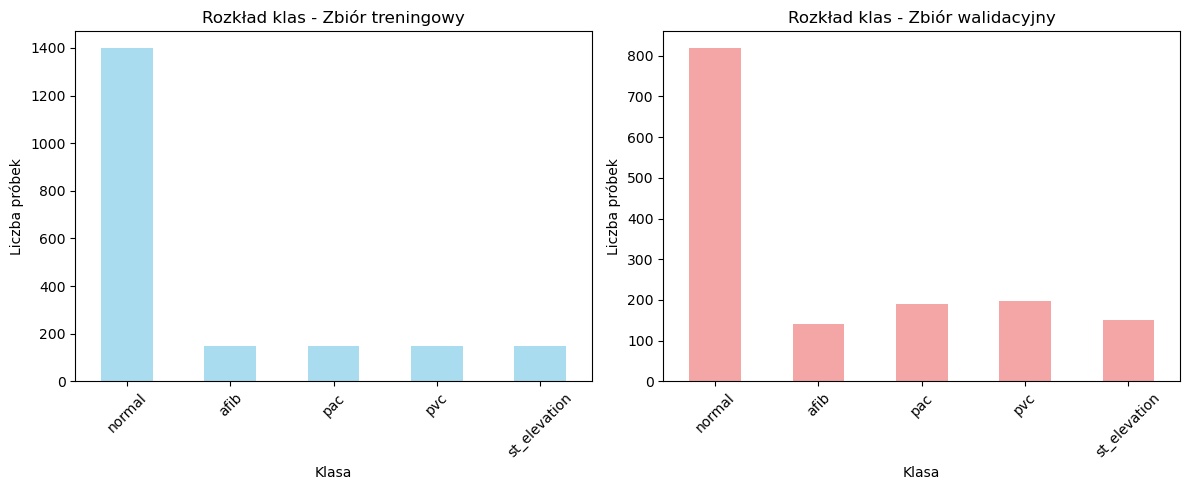

In [94]:
# Konwersja danych do pd.DataFrame dla łatwiejszej analizy
train_df = pd.DataFrame({
    'signal': list(x_train),
    'label': y_train,
    'label_str': y_train_str
})

valid_df = pd.DataFrame({
    'signal': list(x_valid),
    'label': y_valid,
    'label_str': y_valid_str
})

# Mapowanie klas
class_mapping = {
    0: 'normal',
    1: 'afib', 
    2: 'pac',
    3: 'pvc',
    4: 'st_elevation'
}

# Rozkład klas w zbiorze treningowym
train_class_counts = train_df['label'].value_counts().sort_index()
valid_class_counts = valid_df['label'].value_counts().sort_index()

print("=== Rozkład klas ===")
print("Zbiór treningowy:")
for label, count in train_class_counts.items():
    print(f"  {label} ({class_mapping[label]}): {count} próbek ({count/len(train_df)*100:.1f}%)")

print("\nZbiór walidacyjny:")
for label, count in valid_class_counts.items():
    print(f"  {label} ({class_mapping[label]}): {count} próbek ({count/len(valid_df)*100:.1f}%)")

# Wizualizacja rozkładu klas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

train_class_counts.plot(kind='bar', ax=ax1, color='skyblue', alpha=0.7)
ax1.set_title('Rozkład klas - Zbiór treningowy')
ax1.set_xlabel('Klasa')
ax1.set_ylabel('Liczba próbek')
ax1.set_xticklabels([class_mapping[i] for i in train_class_counts.index], rotation=45)

valid_class_counts.plot(kind='bar', ax=ax2, color='lightcoral', alpha=0.7)
ax2.set_title('Rozkład klas - Zbiór walidacyjny')
ax2.set_xlabel('Klasa')
ax2.set_ylabel('Liczba próbek')
ax2.set_xticklabels([class_mapping[i] for i in valid_class_counts.index], rotation=45)

plt.tight_layout()
plt.show()

Wnioski:

Analiza (podobnie jak treść zadania) jednoznacznie pokazuje, że zbiór danych jest silnie niezbalansowany. Klasa normal stanowi aż 70% danych treningowych. Taka sytuacja mogłaby prowadzić do sytuacji, w której model "uczy się" głównie przewidywać najczęstszą klasę, ignorując anomalie. Dlatego konieczne będzie użycie metryki zrównoważonej dokładności oraz zastosowanie w modelu mechanizmu ważenia klas (np. 'class_weight': 'balanced').

### 1.3  Walidacja i Czyszczenie Danych

Ten etap to kontrola jakości naszych danych. Zanim przejdziemy do zaawansowanych analiz, musimy mieć pewność, że dane są kompletne, spójne i nie zawierają technicznych błędów. Stosujemy tu zasadę "ufaj, ale sprawdzaj", programowo weryfikując kluczowe założenia.

=== Walidacja Schematu i Jakości Danych ===
Walidacja wymiarowości: OK
Walidacja zakresu etykiet: OK
Sprawdzenie brakujących wartości: Znaleziono 0 braków

Analiza Wartości Odstających:


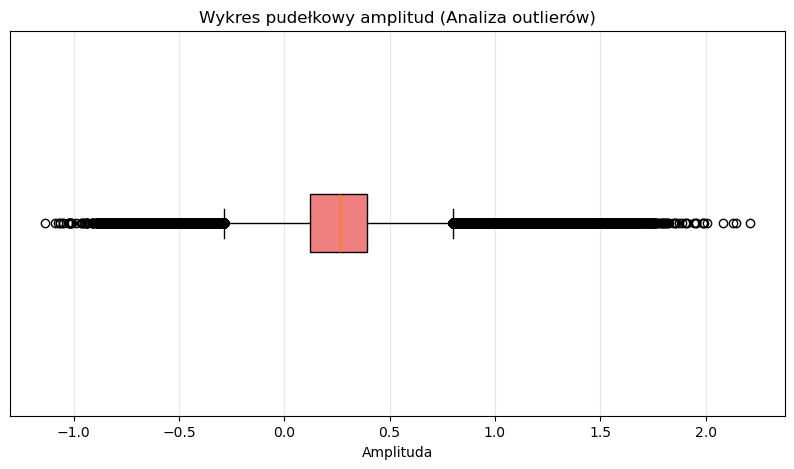

In [95]:
print("=== Walidacja Schematu i Jakości Danych ===")

# a) Walidacja schematu (czy dane pasują do oczekiwanej struktury)
assert x_train.shape[1] == 150, "Błąd: Nieprawidłowa długość sygnału w zbiorze treningowym!"
assert x_valid.shape[1] == 150, "Błąd: Nieprawidłowa długość sygnału w zbiorze walidacyjnym!"
print("Walidacja wymiarowości: OK")

expected_labels = set(y_train)
actual_labels = set(np.unique(np.concatenate([y_train, y_valid])))
assert actual_labels.issubset(expected_labels), f"Błąd: Znaleziono nieoczekiwane etykiety: {actual_labels - expected_labels}"
print("Walidacja zakresu etykiet: OK")

# b) Sprawdzenie kompletności danych (brakujące wartości)
missing_values = np.isnan(x_train).sum() + np.isnan(x_valid).sum()
assert missing_values == 0, f"Błąd: Znaleziono {missing_values} brakujących wartości!"
print(f"Sprawdzenie brakujących wartości: Znaleziono {missing_values} braków")

# c) Analiza wartości odstających (outlierów)
print("\nAnaliza Wartości Odstających:")
plt.figure(figsize=(10, 5))
# vert=False tworzy wykres horyzontalny
# patch_artist=True pozwala na wypełnienie kolorem za pomocą boxprops
box_plot = plt.boxplot(x_train.flatten(), vert=False, patch_artist=True)
# Ustawienie koloru pudełka
for patch in box_plot['boxes']:
    patch.set_facecolor('lightcoral')
    
plt.title('Wykres pudełkowy amplitud (Analiza outlierów)')
plt.xlabel('Amplituda')
plt.yticks([]) 
plt.grid(True, alpha=0.3)
plt.show()

Wnioski:

1. Walidacja schematu przeszła pomyślnie – dane mają poprawną strukturę.
2. Dane są kompletne – nie ma brakujących wartości, co eliminuje potrzebę ich uzupełniania.
3. Analiza wartości odstających pokazuje, że w danych istnieją punkty o skrajnych amplitudach. W kontekście tego problemu medycznego, jest to zjawisko oczekiwane i informatywne (np. wysokie załamki R, anomalie o dużych wahaniach). W związku z tym nie przeprowadzamy czyszczenia outlierów, gdyż mogłoby to usunąć cenne informacje diagnostyczne.

Proces walidacji potwierdził, że pracujemy na zbiorze danych wysokiej jakości. Jest on gotowy do dalszych, bardziej zaawansowanych analiz.

### 1.4 Wizualizacja sygnałów

Po zweryfikowaniu, że nasze dane są kompletne i poprawnie sformatowane, możemy je zwizualizować. Celem tego etapu jest zbudowanie intuicji na temat charakterystyki poszczególnych klas. Obserwacja kształtu sygnałów jest często najlepszym źródłem inspiracji dla późniejszej inżynierii cech.

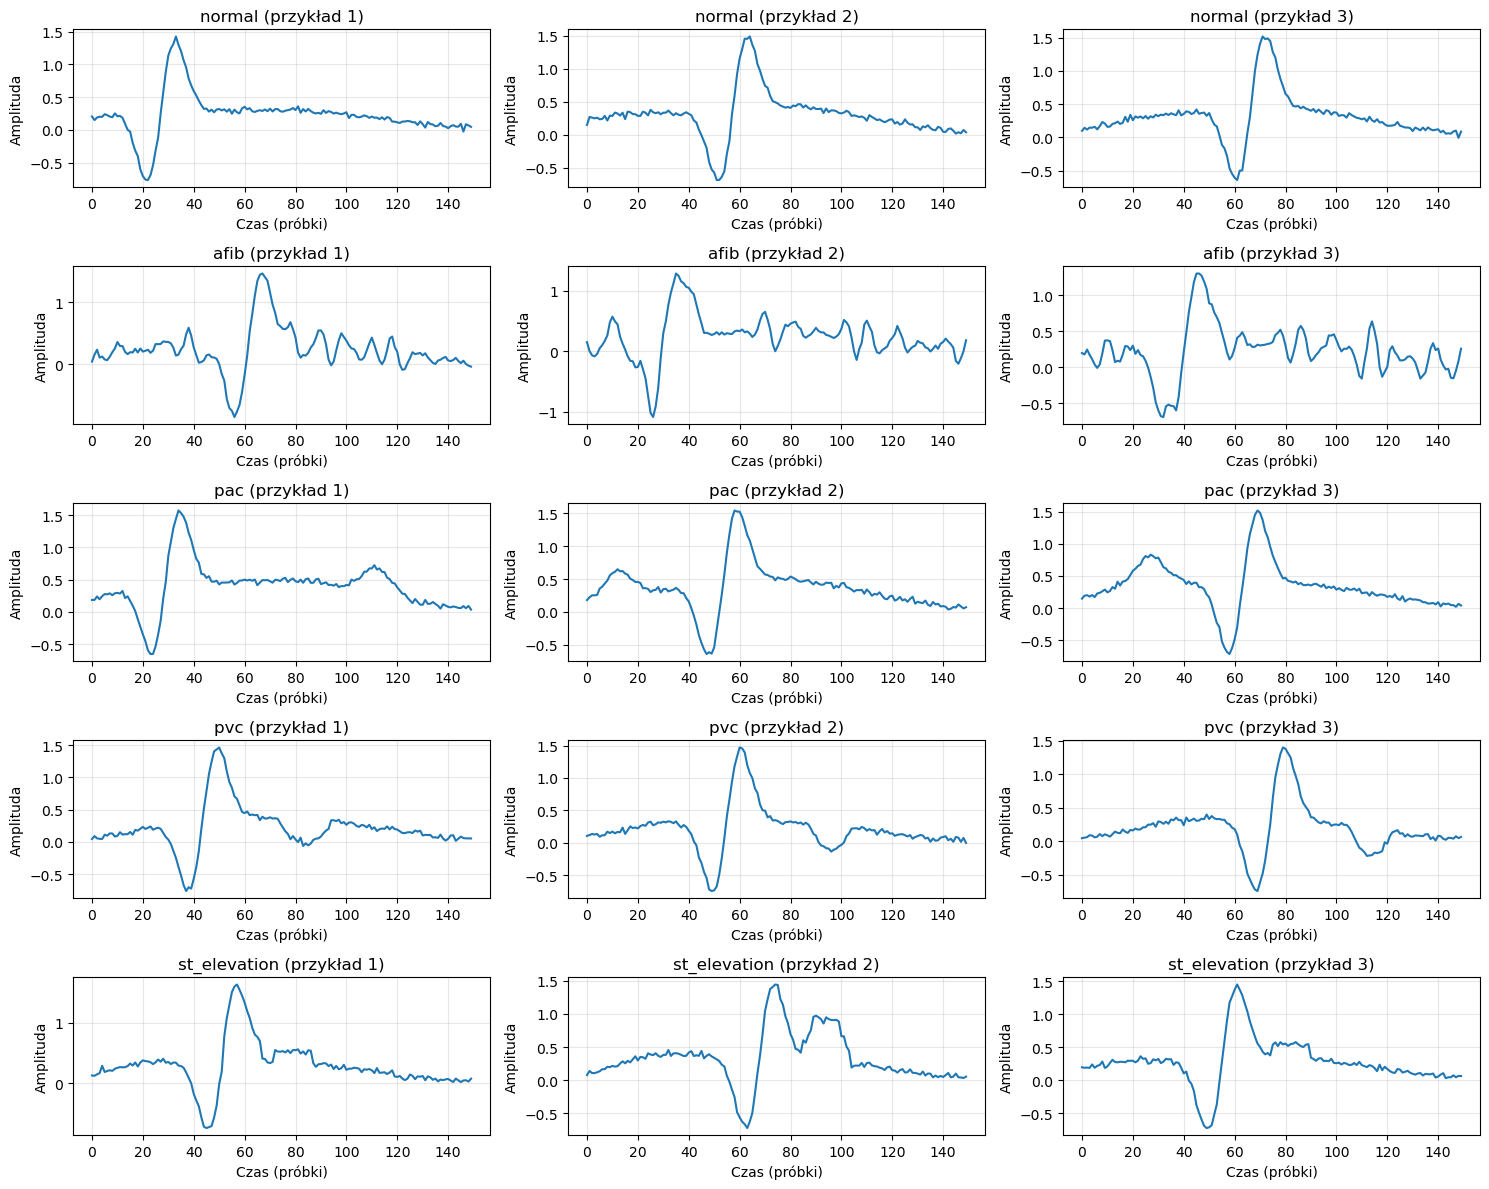

In [96]:
# Funkcja do wizualizacji sygnałów
def plot_signals_by_class(data, labels, class_names, n_examples=3):
    """Wizualizuje przykładowe sygnały dla każdej klasy"""
    n_classes = len(np.unique(labels))
    fig, axes = plt.subplots(n_classes, n_examples, figsize=(15, 12))
    
    for class_idx in range(n_classes):
        # Znajdź indeksy dla danej klasy
        class_indices = np.where(labels == class_idx)[0]
        
        for example_idx in range(min(n_examples, len(class_indices))):
            signal_idx = class_indices[example_idx]
            signal = data[signal_idx]
            
            ax = axes[class_idx, example_idx] if n_classes > 1 else axes[example_idx]
            ax.plot(signal, linewidth=1.5)
            ax.set_title(f'{class_names[class_idx]} (przykład {example_idx + 1})')
            ax.grid(True, alpha=0.3)
            ax.set_xlabel('Czas (próbki)')
            ax.set_ylabel('Amplituda')
    
    plt.tight_layout()
    plt.show()

# Wizualizacja przykładów z każdej klasy
class_names = [class_mapping[i] for i in range(5)]
plot_signals_by_class(x_train, y_train, class_names, n_examples=3)

Wnioski:
- Normal (klasa 0): Sygnały charakteryzują się regularnym, powtarzalnym kształtem z wyraźnym, ostrym zespołem QRS (wysoki pik). Linia bazowa jest stabilna.
- afib (klasa 1): Linia bazowa jest chaotyczna i "drżąca". Brakuje wyraźnych, regularnych załamków P, a amplituda sygnału jest nieregularna.
- pac (klasa 2): Sygnały są bardzo podobne do normalnych, ale mogą zawierać subtelne, dodatkowe wychylenia przed głównym zespołem QRS (przedwczesny załamek P). Różnica może być trudna do zauważenia.
- pvc (klasa 3): Charakterystyczny jest dodatkowy, zdeformowany zespół QRS, który znacznie różni się od normalnego i jest efektem dodatkowego, przedwczesnego uderzenia serca. Często ma dużą, ujemną amplitudę.
- st_elevation (4): Kluczową cechą jest uniesienie odcinka ST – segmentu między końcem zespołu QRS a początkiem załamka T. Wygląda to tak, jakby linia bazowa po załamku R nie wracała do zera, tylko pozostawała na podwyższonym poziomie.

Te wizualne różnice są podstawą do stworzenia metacech. Musimy przełożyć te obserwacje na konkretne, mierzalne wartości liczbowe.

### 1.5 Analiza Statystyczna Różnicująca Klasy

Wizualne intuicje przekładamy teraz na mierzalne wartości. Celem tej analizy jest znalezienie prostych statystyk, które w ilościowy sposób różnicują od siebie poszczególne klasy. Będzie to bezpośrednią inspiracją dla tworzonych później metacech.


--- Analiza kluczowych charakterystyk sygnałów w podziale na klasy ---


,ID Klasy,Zmienność (średnia),Zakres Amplitud (średnia)
0,0,7.5,2.19
1,1,11.4,2.27
2,2,7.8,2.19
3,3,7.9,2.19
4,4,8.2,2.26


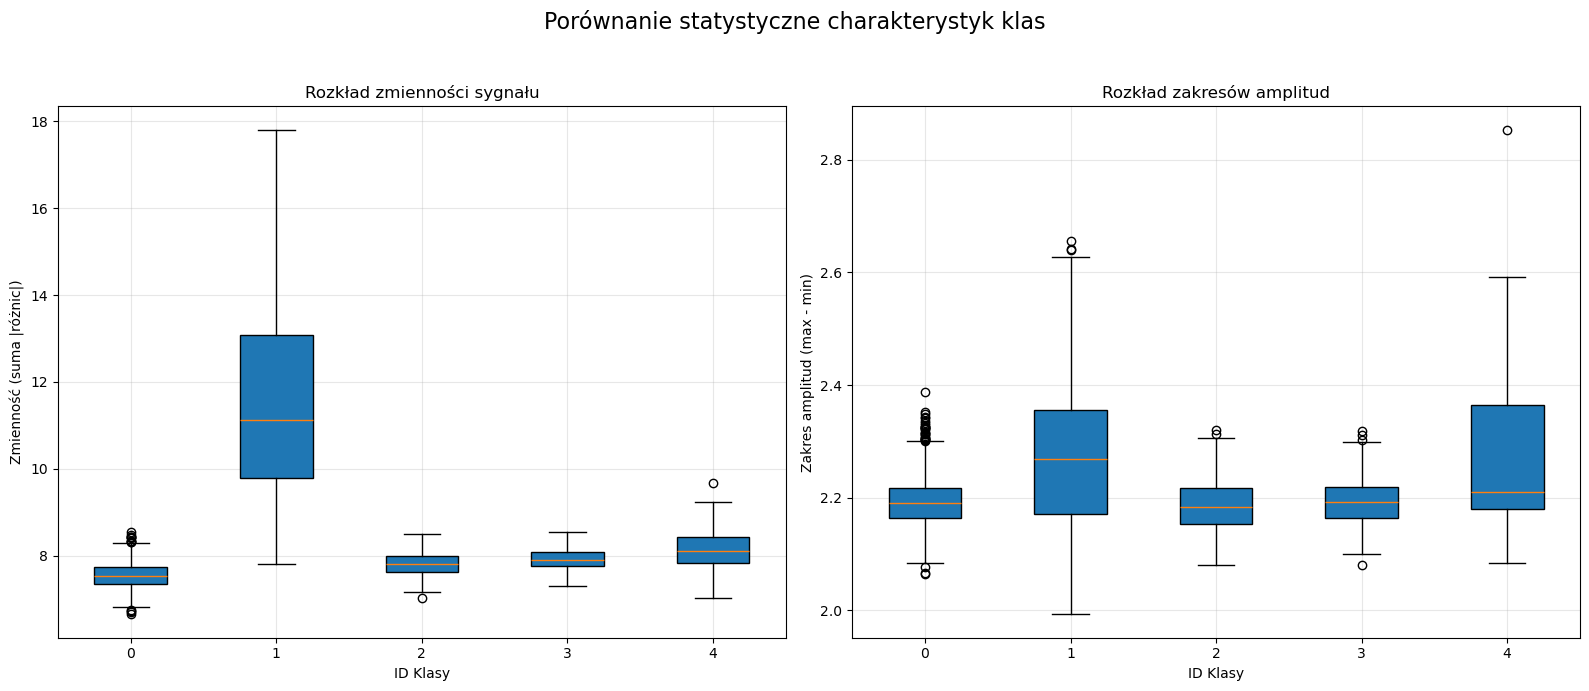

In [97]:
def analyze_signal_characteristics(signals, labels):
    """Analizuje kluczowe charakterystyki sygnałów, które będą podstawą dla metacech."""
    results = []
    unique_labels = sorted(np.unique(labels))
    
    for class_idx in unique_labels:
        class_signals = signals[labels == class_idx]
        
        if len(class_signals) > 0:
            #Zmienność sygnału
            variabilities = [np.sum(np.abs(np.diff(s))) for s in class_signals]
            
            #Zakres amplitud
            ranges = np.max(class_signals, axis=1) - np.min(class_signals, axis=1)
            
            results.append({
                'ID Klasy': class_idx,
                'Zmienność (średnia)': f"{np.mean(variabilities):.1f}",
                'Zakres Amplitud (średnia)': f"{np.mean(ranges):.2f}",
            })
    
    return pd.DataFrame(results)

# Tabela z analizą charakterystyk
stats_df = analyze_signal_characteristics(x_train, y_train)
print("--- Analiza kluczowych charakterystyk sygnałów w podziale na klasy ---")
display(stats_df)

# Przygotowanie danych do wykresów pudełkowych
class_variabilities = {i: [np.sum(np.abs(np.diff(s))) for s in x_train[y_train == i]] for i in np.unique(y_train)}
class_ranges = {i: np.max(x_train[y_train == i], axis=1) - np.min(x_train[y_train == i], axis=1) for i in np.unique(y_train)}

# Wizualizacja
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Porównanie statystyczne charakterystyk klas', fontsize=16)

# Wykres 1: Zmienność sygnału
axes[0].boxplot(class_variabilities.values(), patch_artist=True)
axes[0].set_title('Rozkład zmienności sygnału')
axes[0].set_xlabel('ID Klasy')
axes[0].set_ylabel('Zmienność (suma |różnic|)')
axes[0].set_xticklabels(class_variabilities.keys())
axes[0].grid(True, alpha=0.3)

# Wykres 2: Zakres amplitud
axes[1].boxplot(class_ranges.values(), patch_artist=True)
axes[1].set_title('Rozkład zakresów amplitud')
axes[1].set_xlabel('ID Klasy')
axes[1].set_ylabel('Zakres amplitud (max - min)')
axes[1].set_xticklabels(class_ranges.keys())
axes[1].grid(True, alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Wnioski:

- Zmienność sygnału: Klasa 1 (AFib) ma zdecydowanie najwyższą średnią zmienność ("chropowatość"), co odzwierciedla jej chaotyczny charakter. To silny dowód na to, że metacecha oparta na sumie zmian (sum_of_changes) będzie skutecznym dyskryminatorem dla tej klasy.
- Zakres Amplitud: Prosta metryka max-min pokazuje, że klasy 1 i 4 mają tendencję do większych i bardziej zróżnicowanych wahań. Co ciekawe, klasa 3 (PVC) nie wyróżnia się znacząco na tym tle, co sugeruje, że ta prosta miara jest niewystarczająca do jej wykrycia. Ta obserwacja podkreśla konieczność stworzenia bardziej zaawansowanej cechy, która w bardziej wyrafinowany sposób uchwyci deformacje morfologiczne, co będzie celem etapu inżynierii cech.

### 1.6 Weryfikacja Spójności Zbiorów Danych

To ostatni krok kontroli jakości przed modelowaniem. Sprawdzamy, czy zbiór treningowy i walidacyjny pochodzą z tej samej dystrybucji statystycznej. Jeśli tak nie jest, ocena modelu na zbiorze walidacyjnym byłaby niewiarygodna.

In [98]:
# Spłaszczamy dane, aby obliczyć globalne statystyki
x_train_flat = x_train.flatten()
x_valid_flat = x_valid.flatten()

# Tabela porównawcza
stats_comparison_df = pd.DataFrame({
    'Metryka': ['Średnia', 'Odch. std.', 'Min', 'Mediana', 'Max'],
    'Zbiór Treningowy': [np.mean(x_train_flat), np.std(x_train_flat), np.min(x_train_flat), np.median(x_train_flat), np.max(x_train_flat)],
    'Zbiór Walidacyjny': [np.mean(x_valid_flat), np.std(x_valid_flat), np.min(x_valid_flat), np.median(x_valid_flat), np.max(x_valid_flat)]
})

print("--- Porównanie statystyk opisowych zbiorów danych ---")
display(stats_comparison_df)

--- Porównanie statystyk opisowych zbiorów danych ---


,Metryka,Zbiór Treningowy,Zbiór Walidacyjny
0,Średnia,0.284796,0.285263
1,Odch. std.,0.359331,0.360844
2,Min,-1.134648,-1.184748
3,Mediana,0.262539,0.261984
4,Max,2.209385,1.950620


Wnioski:

Podstawowe statystyki dla obu zbiorów są niemal identyczne. Daje nam to pewność, że zbiór walidacyjny jest reprezentatywną próbką i możemy mu ufać podczas oceny naszego modelu.

## 2. Ekstrakcja cech

To najważniejszy etap tego zadania. Zamiast podawać modelowi surowy, 150-wymiarowy sygnał, stworzymy 4 nowe cechy (metacechy), które w zwięzły sposób opiszą kluczowe charakterystyki sygnału. Naszym celem jest zaprojektowanie cech, które będą dobrze separować od siebie poszczególne klasy. Inspiracją będą obserwacje z eksploracji danych oraz opis medyczny anomalii.

Poniżej przedstawiamy funkcje pomocnicze, które posłużą do ekstrakcji finalnych metacech:

**Uwaga** - ekstrakcja cech to proces, który jest zarówno czasochłonny, jak i kreatywny. Podczas tego procesu **nie ma jednej, uniwersalnej "poprawnej" odpowiedzi**. W zależności od kontekstu i założeń modelu, różni specjaliści mogą wybrać różne cechy, które uznają za najistotniejsze dla rozwiązywanego problemu. Dlatego wyniki uzyskane przez różnych ekspertów w tej samej dziedzinie mogą się różnić, a różne podejścia mogą prowadzić do równie dobrych rezultatów.

<p align="center">
  <img src="https://imgs.xkcd.com/comics/machine_learning.png" alt="xkcd Machine Learning" width="300"><br>
  <sub>
    Comic "<a href="https://xkcd.com/1838/">Machine Learning</a>" by 
    <a href="https://xkcd.com/">Randall Munroe</a>, 
    licensed under <a href="https://creativecommons.org/licenses/by-nc/2.5/">CC BY-NC 2.5</a>.
  </sub>
</p>

Warto pamiętać, ze proces ekstrakcji cech jest dynamiczny i zależny od danych, algorytmu oraz celu modelu. Często wymaga iteracyjnego dostosowywania i testowania różnych kombinacji cech, aby znaleźć najlepszą reprezentację danych i uzyskać jak najdokładniejsze wyniki.


### 2.1 Segmentacja sygnału wokół zespołu QRS

Kluczowe informacje diagnostyczne często leżą w segmentach przed (załamek P) i po (odcinek ST, załamek T) głównym zespole QRS. Aby je przeanalizować, musimy najpierw zlokalizować sam zespół QRS. Możemy to zrobić w przybliżeniu, znajdując globalne minimum (załamek Q lub S) i maksimum (załamek R) w sygnale.

Funkcja split_on_qrs
Ta funkcja dzieli sygnał na trzy części:

1. pre-QRS: fragment sygnału przed zespołem QRS.
2. QRS: sam zespół (nie jest bezpośrednio zwracany, ale wyznacza podział).
3. post-QRS: fragment sygnału po zespole QRS.

In [99]:
def split_on_qrs(x: np.ndarray) -> tuple[list[np.ndarray], list[np.ndarray]]:
    """
    Dzieli sygnał na część przed i po zespole QRS.
    Lokalizacja QRS jest przybliżana na podstawie globalnego min i max.
    """
    minimum_idx = x.argmin(axis=1)
    maximum_idx = x.argmax(axis=1)
    
    # Środek QRS jest przybliżany jako środek między min i max
    center = (minimum_idx + maximum_idx) // 2
    # Okres (szerokość) QRS jest szacowany na podstawie odległości min-max
    period = (1.5 * (maximum_idx - minimum_idx)).astype(int)

    # Wyznaczamy granice segmentów
    pre_end = center - period
    post_start = center + period

    # Dzielimy sygnał na listy fragmentów
    pre = [x_[0:end.item()] for x_, end in zip(x, pre_end)]
    post = [x_[start.item():] for x_, start in zip(x, post_start)]
    
    return pre, post

### 2.3 Definicje Metacech

Teraz, mając narzędzia do preprocessingu i segmentacji, możemy zdefiniować nasze 4 metacechy.

#### Cecha 1: Suma zmian

Jak już zauważyliśmy w podpunkcie 1.5: Migotanie przedsionków (AFib) charakteryzuje się chaotyczną, "drżącą" linią bazową. Ta cecha mierzy "gładkość" sygnału poza głównym zespołem QRS. Wysoka wartość będzie wskazywać na nieregularny, zaszumiony sygnał, typowy dla AFib.

In [100]:
def compute_sum_of_changes(post_pre: list[np.ndarray]) -> np.ndarray:
    """Oblicza sumę wartości bezwzględnych różnic kolejnych próbek.
    Miara "gładkości" lub "chaotyczności" sygnału."""
    return np.array([np.sum(np.abs(np.diff(ts))) for ts in post_pre])

#### Cecha 2 i 3: Amplituda (max_dev_amplitude) i Pozycja (max_dev_position) maksymalnej dewiacji

Spróbujmy wymyślić coś nowego: Kształt i wysokość załamków P i T są ważne diagnostycznie. Na przykład, nietypowy załamek P może wskazywać na PAC, a wysoki załamek T może towarzyszyć innym anomaliom. Ta funkcja znajduje największe odchylenie (w górę lub w dół) od średniej w segmentach pre- i post-QRS i zwraca jego wielkość (amplitudę) oraz pozycję.

In [101]:
def compute_max_deviation(post_pre: list[np.ndarray]) -> tuple[np.ndarray, np.ndarray]:
    """
    Znajduje pozycję i amplitudę maksymalnego odchylenia od średniej
    w sygnale (połączonych segmentach pre i post).
    """
    positions = []
    amplitudes = []
    for ts in post_pre:
        mean = np.mean(ts)

        # Znajdź odchylenie w górę
        max_idx = ts.argmax()
        max_amp = np.abs(ts[max_idx] - mean)

        # Znajdź odchylenie w dół
        min_idx = ts.argmin()
        min_amp = np.abs(ts[min_idx] - mean)

        # Wybierz większe z odchyleń
        if max_amp > min_amp:
            positions.append(max_idx)
            amplitudes.append(max_amp)
        else:
            positions.append(min_idx)
            amplitudes.append(min_amp)
            
    return np.array(positions), np.array(amplitudes)

#### Cecha 4: Różnica średnich w segmencie post-QRS (post_mean_diff)

Intuicja: Ta cecha jest zaprojektowana specjalnie do wykrywania uniesienia odcinka ST (STEMI). Porównuje ona średnią wartość sygnału tuż po zespole QRS (pierwsze 20 próbek) ze średnią w następnym oknie (kolejne 20 próbek). W przypadku STEMI, pierwsza średnia powinna być znacząco wyższa, co da dużą dodatnią wartość tej cechy.

In [102]:
def compute_post_mean_diff(posts: list[np.ndarray]) -> np.ndarray:
    """
    Oblicza różnicę średnich amplitud w dwóch kolejnych oknach w segmencie post-QRS.
    Czuła na uniesienie/obniżenie odcinka ST.
    """
    diffs = []
    for p in posts:
        # Zabezpieczenie przed zbyt krótkimi segmentami
        if len(p) < 40:
            diffs.append(0)
        else:
            mean1 = np.mean(p[:20])
            mean2 = np.mean(p[20:40])
            diffs.append(mean1 - mean2)
    return np.array(diffs)

## 3. Budowa i Trening Modelu

Mając przygotowane metacechy, możemy przejść do budowy i treningu naszego klasyfikatora. Zgodnie z wymaganiami zadania, użyjemy RandomForestClassifier z sklearn.



### 3.1 Definicja klasy YourSolution
Aby uporządkować kod i przygotować go do ewaluacji na platformie, zamykamy naszą logikę w klasie YourSolution.

In [103]:
class YourSolution(ISolution):

    def compute_meta_features(self, x: np.ndarray) -> np.ndarray:
        # Metoda obliczająca 4 metacechy dla podanego zbioru danych X i zwraca wynik jako tablicę NumPy
        pres, posts = split_on_qrs(x)
        post_pre_combined = [np.concatenate([pre, post]) for pre, post in zip(pres, posts)]
        
        sum_of_changes = compute_sum_of_changes(post_pre_combined)
        position, amplitude = compute_max_deviation(post_pre_combined)
        post_diff_mean = compute_post_mean_diff(posts)
        
        # Tworzymy DataFrame dla wygody, na końcu konwertujemy go do NumPy array
        meta_features_df = pd.DataFrame({
            "max_dev_position": position,
            "max_dev_amplitude": amplitude,
            "sum_of_changes": sum_of_changes,
            "post_mean_diff": post_diff_mean
        })
        
        return meta_features_df.values

    @staticmethod
    def get_rf_hyperparameters() -> dict[str, int | float | str]:
        #Metoda zwracająca hiperparametry dla klasyfikatora RandomForest.
        return {
            'n_estimators': 10,
            'max_depth': 10,
            'random_state': 42, # Ten parametr jest nadpisywany przez validate_hyperparameters
            'class_weight': 'balanced' # Ważny parametr dla niezbalansowanych danych
        }

### 3.2 Cykl uczenia i ewaluacji

Tworzenie i trenowanie modelu za pomocą YourSolution.create_with_training()...
Trenowanie zakończone.

Obliczanie metacech dla zbioru walidacyjnego...
Predykcja na zbiorze walidacyjnym zakończona.

Zbalansowana dokładność klasyfikacji na zbiorze walidacyjnym: 0.8297

Raport klasyfikacji:
              precision    recall  f1-score   support

      normal       0.90      0.97      0.93       819
        afib       0.98      0.99      0.98       142
         pac       0.85      0.73      0.79       191
         pvc       0.82      0.58      0.68       197
st_elevation       0.80      0.87      0.84       151

    accuracy                           0.88      1500
   macro avg       0.87      0.83      0.84      1500
weighted avg       0.88      0.88      0.88      1500

Generowanie macierzy pomyłek...


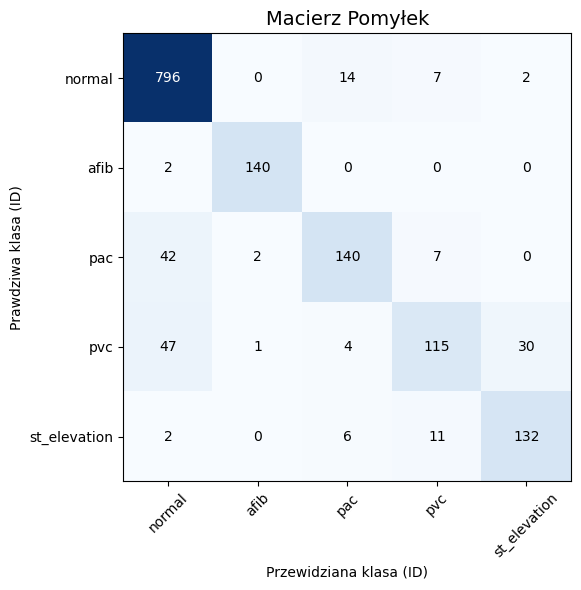

In [104]:
# Krok 1: Inicjalizacja i trening za pomocą metody z interfejsu
print("Tworzenie i trenowanie modelu za pomocą YourSolution.create_with_training()...")
solution = YourSolution.create_with_training()
print("Trenowanie zakończone.")

# Krok 2: Obliczenie metacech dla zbioru walidacyjnego
print("\nObliczanie metacech dla zbioru walidacyjnego...")
x_valid_meta = solution.compute_meta_features(x_valid)

# Krok 3: Predykcja na zbiorze walidacyjnym
# Używamy modelu `random_forest`, który został już wytrenowany wewnątrz `create_with_training`
y_valid_pred = solution.random_forest.predict(x_valid_meta)
print("Predykcja na zbiorze walidacyjnym zakończona.")

# Krok 4: Szczegółowa ewaluacja (Raport i Macierz Pomyłek)
balanced_acc = balanced_accuracy_score(y_valid, y_valid_pred)
print(f"\nZbalansowana dokładność klasyfikacji na zbiorze walidacyjnym: {balanced_acc:.4f}")

# Wyświetlanie raportu klasyfikacji
print("\nRaport klasyfikacji:")
class_ids = np.unique(y_train)
# Używamy `zero_division=0` na wypadek, gdyby w danych walidacyjnych nie było przykładów dla jakiejś klasy
print(classification_report(y_valid, y_valid_pred, labels=class_ids, target_names=class_names, zero_division=0))

# Wyświetlanie macierzy pomyłek przy użyciu matplotlib
print("Generowanie macierzy pomyłek...")
conf_matrix = confusion_matrix(y_valid, y_valid_pred, labels=class_ids, )
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(conf_matrix, cmap='Blues')

# Ustawienie etykiet na osiach na ID klas
ax.set_xticks(range(len(class_names)))
ax.set_yticks(range(len(class_names)))
ax.set_xticklabels(class_names, rotation=45)
ax.set_yticklabels(class_names)

# Dodanie etykiet osi i tytułu
ax.set_xlabel("Przewidziana klasa (ID)")
ax.set_ylabel("Prawdziwa klasa (ID)")
ax.set_title("Macierz Pomyłek", fontsize=14)

# Dodanie wartości liczbowych do komórek macierzy
for i in range(len(class_ids)):
    for j in range(len(class_ids)):
        # Dobór koloru tekstu w zależności od tła dla lepszej czytelności
        color = "white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black"
        ax.text(j, i, conf_matrix[i, j], ha="center", va="center", color=color)

fig.tight_layout()
plt.show()

### 3.3 Ewaluacja przy użyciu kodu "Kryterium Oceniające" z zadania. 

Zweryfikujmy, że wynik jest ten sam:

In [105]:
print(f"Ocena: {score_solution(solution)} pkt")

Ocena działania modelu: 

Zbalansowana dokładność klasyfikacji:  82.9749
Ocena: 35 pkt


### 3.4. Analiza Wyniku

Zrównoważona dokładność na poziomie **82.97%** świadczy o umiarkowanej skuteczności modelu na niezbalansowanym zbiorze danych. Model osiągnął **35 punktów** według kryterium oceny, co wskazuje na znaczący potencjał do poprawy.

#### Raport Klasyfikacji:

Funkcja `classification_report` z biblioteki scikit-learn automatycznie generuje kompleksową analizę wydajności modelu. Dla każdej klasy oblicza precyzję, czułość i F1-score, a dodatkowo agreguje te metryki na trzy sposoby: **accuracy** (globalna dokładność), **macro avg** (średnia arytmetyczna - wszystkie klasy równo ważone) oraz **weighted avg** (średnia ważona support'em - klasy liczniejsze mają większy wpływ). Kolumna **support** pokazuje liczbę próbek danej klasy w zbiorze.

**Precyzja (Precision)** - "Spośród wszystkich przypadków wskazanych przez model jako dana klasa, ile % faktycznie do niej należało?"
- Najwyższa dla klasy 1 (AFib): **98%** - spośród 143 przypadków wskazanych przez model jako AFib, 140 faktycznie było AFib
- Najniższa dla klasy 4 (st_elevation): **80%** - z 164 przypadków wskazanych jako zawał, 132 faktycznie było zawałem (32 to błędne alarmy)

**Czułość (Recall)** - "Spośród wszystkich próbek rzeczywiście należących do danej klasy, ile % zostało przez model poprawnie przydzielonych do tej klasy?"
- **Klasa 3 (PVC) - 58%** - ze 197 próbek faktycznie należących do PVC, model wykrył tylko 115, **pomijając 82 przypadki**
- **Klasa 2 (PAC) - 73%** - z 191 próbek PAC model wykrył 140, **pomijając 51 przypadków**

**F1-Score** (średnia harmoniczna precyzji i czułości):
- Klasa 3 (**68%**) - niska wartość potwierdza problemy zarówno z precyzją (82%), jak i czułością (58%)

**Support** - liczba próbek rzeczywiście należących do danej klasy w zbiorze walidacyjnym:
- Klasa 0 (normal): **819** - dominująca klasa (55% zbioru)
- Klasy anomalii: 1 (142), 2 (191), 3 (197), 4 (151)
- Niezbalansowanie danych potwierdza konieczność użycia zrównoważonej dokładności jako metryki

#### Macierz Pomyłek:

Macierz pomyłek (confusion matrix) to tabela wizualizująca wydajność modelu klasyfikacji, gdzie **wiersze reprezentują prawdziwe klasy**, a **kolumny reprezentują predykcje modelu**. Wartości na głównej przekątnej to poprawne klasyfikacje, wartości poza nią to błędy. Analiza macierzy ujawnia konkretne pary klas, które model myli ze sobą, co jest kluczowe dla diagnozy problemów i dalszej poprawy modelu.

**Główna przekątna** (poprawne klasyfikacje): 796, 140, 140, 115, 132 - wyraźnie widoczne problemy z klasami 2 i 3.

**Kluczowe wzorce błędów:**

1. **Klasa 3 (PVC) - 82 błędy z 197 próbek:**
   - **47 → normal** (57% błędów) - model nie wykrywa zdeformowanego zespołu QRS
   - **30 → st_elevation** (37% błędów) - mylenie deformacji z uniesieniem ST
   - **4 → pac** - trudności w rozróżnianiu przedwczesnych pobudzeń

2. **Klasa 2 (PAC) - 51 błędów z 191 próbek:**
   - **42 → normal** (82% błędów) - subtelny przedwczesny załamek P jest niewidoczny dla modelu
   - **7 → pvc** - wzajemne mylenie z klasą 3

3. **Wzajemne mylenie klas 2 ↔ 3:** Łącznie 11 przypadków - obecne metacechy nie wychwytują subtelnych różnic morfologicznych między PAC a PVC

4. **Klasa 0 (Normal) - tylko 23 błędy z 819** (3%) - model bardzo dobrze identyfikuje prawidłowe sygnały

**Wniosek:** Największym wyzwaniem jest wykrywanie klasy 3 (PVC) - model ma tendencję do mylenia jej z klasą 0 lub 4. Druga istotna słabość to niska czułość dla klasy 2 (PAC), gdzie subtelne anomalie w załamku P są trudne do wychwycenia przez obecne metacechy.

## 4. Analiza błędów
Aby jeszcze lepiej zrozumieć działanie naszego modelu, możemy zwizualizować przypadki, w których się pomylił. Pomoże to zidentyfikować potencjalne słabości i ewentualne kierunki dalszych ulepszeń.

Liczba błędnie sklasyfikowanych próbek: 177


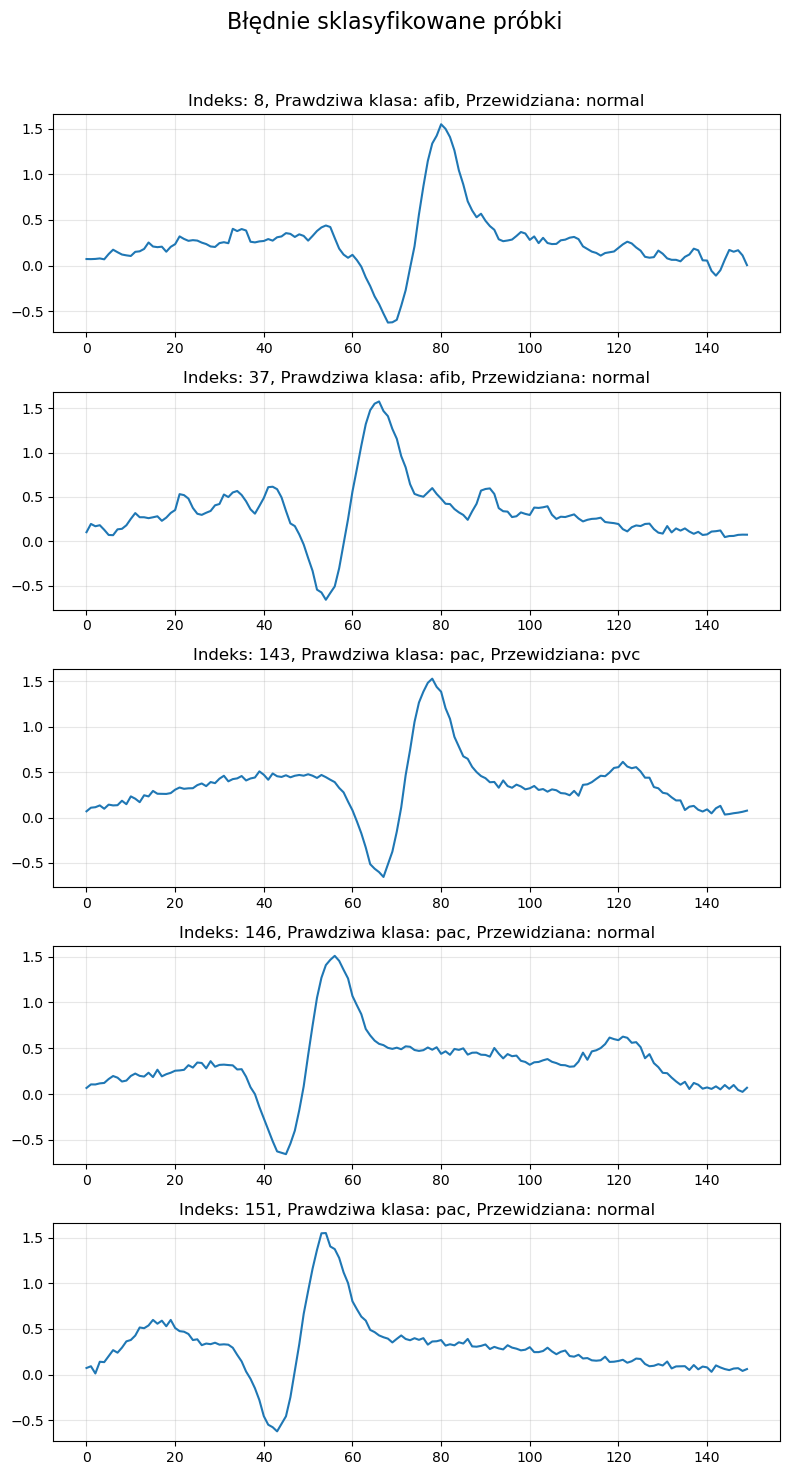

In [106]:
# Znajdź indeksy błędnie sklasyfikowanych próbek
missclassified_indices = np.where(y_valid != y_valid_pred)[0]

print(f"Liczba błędnie sklasyfikowanych próbek: {len(missclassified_indices)}")

if len(missclassified_indices) > 0:
    # Ustawiamy liczbę przykładów do wyświetlenia
    n_plots = min(len(missclassified_indices), 5) 
    
    fig, axes = plt.subplots(n_plots, 1, figsize=(8, n_plots * 3))
    # Jeśli jest tylko jeden błąd, axes nie jest tablicą, więc opakowujemy go w listę
    if n_plots == 1:
        axes = [axes]
        
    fig.suptitle("Błędnie sklasyfikowane próbki", fontsize=16)

    for i, idx in enumerate(missclassified_indices[:n_plots]):
        ax = axes[i]
        
        # Pobieramy numeryczne ID klas bezpośrednio z wektorów etykiet
        true_label_id = y_valid[idx]
        pred_label_id = y_valid_pred[idx]
        
        
        # Używamy oryginalnego, nieskalowanego sygnału do wizualizacji
        ax.plot(x_valid[idx])
        
        # Ustawiamy tytuł wykresu, używając ID klas
        ax.set_title(f"Indeks: {idx}, Prawdziwa klasa: {class_names[true_label_id]}, Przewidziana: {class_names[pred_label_id]}")
        ax.grid(True, alpha=0.3)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


## 5. Iteracyjne Ulepszanie - 
Proces tworzenia modelu uczenia maszynowego rzadko kończy się na pierwszej iteracji. Nasz model v1 osiągnął 82.97% zrównoważonej dokładności - to dobry wynik, ale analiza błędów pokazała wyraźne słabości, szczególnie w klasach 2 (PAC) i 3 (PVC). Naturalnym krokiem jest próba poprawy tych wyników poprzez modyfikację metacech.

**Uwaga** - Ta sekcja dokumentuje eksperyment, który zakończył się niepowodzeniem. Szczegółowa analiza przyczyny porażki znajduje się na końcu.

### 5.1 Obserwacja i Hipoteza

Spróbujmy najpierw poprawić wynik klasy 2. Jak juz ustaliliśmy w podpunkcie 1.4 - mogą zawierać subtelne, dodatkowe wychylenia przed głównym zespołem QRS (przedwczesny załamek P). Różnica może być trudna do zauważenia.

Nasza obecna metacecha `max_dev_amplitude` szuka największego odchylenia od średniej w **całym sygnale** - zarówno przed, jak i po zespole QRS. Oznacza to, że:
- Analizuje segment pre-QRS (gdzie może być przedwczesny załamek P)
- Analizuje segment post-QRS (gdzie znajduje się załamek T)

**Hipoteza**: Jeśli skupimy się wyłącznie na segmencie pre-QRS, eliminując załamek T z analizy, powinniśmy lepiej wychwycić subtelne anomalie związane z przedwczesnym pobudzeniem przedsionkowym.

**Uwaga** - Spójrz na wizualizację w sekcji 1.4 lub 4.0 - czy jesteś w stanie zauważyć problem z tym podejsciem?


### 5.2 Propozycja Zmiany

Zmodyfikujemy metacechę odpowiedzialną za wykrywanie maksymalnych odchyleń:

**Obecnie:** `max_dev_amplitude` - największe odchylenie w segmentach pre+post  
**Nowe podejście:** `pre_qrs_max_dev_amp` - największe odchylenie tylko w segmencie pre-QRS






### 5.3 Implementacja i Ponowna Ewaluacja
Tworzymy nową wersję funkcji compute_features, która implementuje naszą zmianę, a następnie ponownie przeprowadzamy cały cykl treningu i oceny.

In [107]:
class YourSolutionV2(ISolution):

    def compute_meta_features(self, x: np.ndarray) -> np.ndarray:
        """
        Nowa wersja funkcji do ekstrakcji cech.
        Cecha 'max_dev_amplitude' została zastąpiona przez 'pre_qrs_max_dev_amp',
        która jest obliczana wyłącznie na segmencie pre-QRS.
        """
        pres, posts = split_on_qrs(x)
        post_pre_combined = [np.concatenate([pre, post]) for pre, post in zip(pres, posts)]
        
        # Obliczamy cechy tak jak poprzednio...
        sum_of_changes = compute_sum_of_changes(post_pre_combined)
        post_diff_mean = compute_post_mean_diff(posts)
        pre_qrs_position = compute_max_deviation(post_pre_combined)[0]
                # ... z wyjątkiem nowej cechy, liczonej tylko na `pres`.
        pre_qrs_amplitude = compute_max_deviation(pres)[1]
        
        meta_features_df = pd.DataFrame({
            "pre_qrs_max_dev_pos": pre_qrs_position,
            "pre_qrs_max_dev_amp": pre_qrs_amplitude, 
            "sum_of_changes": sum_of_changes,
            "post_mean_diff": post_diff_mean
        })
        return meta_features_df.values

    @staticmethod
    def get_rf_hyperparameters() -> dict[str, int | float | str]:
        return {
            'n_estimators': 10,
            'max_depth': 10,
            'random_state': 42,
            'class_weight': 'balanced'
        }

Tworzenie i trenowanie modelu za pomocą YourSolutionV2.create_with_training()...
Trenowanie zakończone.

Obliczanie metacech dla zbioru walidacyjnego...
Predykcja na zbiorze walidacyjnym zakończona.

Zbalansowana dokładność klasyfikacji na zbiorze walidacyjnym: 0.8084

Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       819
           1       0.97      0.99      0.98       142
           2       0.92      0.71      0.80       191
           3       0.71      0.56      0.63       197
           4       0.71      0.80      0.75       151

    accuracy                           0.88      1500
   macro avg       0.85      0.81      0.82      1500
weighted avg       0.87      0.88      0.87      1500

Generowanie macierzy pomyłek...


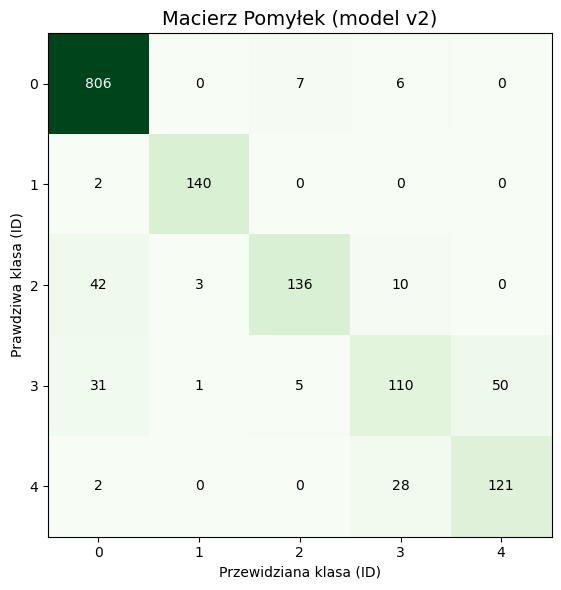

In [108]:
print("Tworzenie i trenowanie modelu za pomocą YourSolutionV2.create_with_training()...")
solution_v2 = YourSolutionV2.create_with_training()
print("Trenowanie zakończone.")

print("\nObliczanie metacech dla zbioru walidacyjnego...")
x_valid_meta_v2 = solution_v2.compute_meta_features(x_valid)

y_valid_pred_v2 = solution_v2.random_forest.predict(x_valid_meta_v2)
print("Predykcja na zbiorze walidacyjnym zakończona.")

balanced_acc_v2 = balanced_accuracy_score(y_valid, y_valid_pred_v2)
print(f"\nZbalansowana dokładność klasyfikacji na zbiorze walidacyjnym: {balanced_acc_v2:.4f}")

print("\nRaport klasyfikacji:")
class_ids = np.unique(np.concatenate((y_train, y_valid)))
print(classification_report(y_valid, y_valid_pred_v2, labels=class_ids, zero_division=0))

print("Generowanie macierzy pomyłek...")
conf_matrix_v2 = confusion_matrix(y_valid, y_valid_pred_v2, labels=class_ids)
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(conf_matrix_v2, cmap='Greens')

ax.set_xticks(class_ids)
ax.set_yticks(class_ids)
ax.set_xticklabels(class_ids)
ax.set_yticklabels(class_ids)

ax.set_xlabel("Przewidziana klasa (ID)")
ax.set_ylabel("Prawdziwa klasa (ID)")
ax.set_title("Macierz Pomyłek (model v2)", fontsize=14)

for i in range(len(class_ids)):
    for j in range(len(class_ids)):
        color = "white" if conf_matrix_v2[i, j] > conf_matrix_v2.max() / 2 else "black"
        ax.text(j, i, conf_matrix_v2[i, j], ha="center", va="center", color=color)

fig.tight_layout()
plt.show()

### 5.4 Analiza Wyników - Co Poszło Nie Tak?

#### Rozczarowujący wynik

Model v2 osiągnął jedynie 80.84% balanced accuracy - spadek o 2.13 punktu procentowego względem v1 (82.97%). Wbrew naszym oczekiwaniom, klasa PAC, którą próbowaliśmy ulepszyć, pogorszyła się nieznacznie z 73% do 71% recall. Klasa PVC pozostała na podobnym poziomie (58% → 56%), ale najbardziej ucierpiała klasa STEMI z wyraźnym spadkiem z 87% do 80% recall.

#### Kluczowe odkrycie

Wracając do wizualizacji z sekcji 1.4 lub 4.0, dostrzegamy coś istotnego: w niektórych przykładach PAC podwyższenie występuje po głównym kompleksie PQRST, w części post-QRS. Jak to możliwe?

Każda próbka to tylko 150 punktów czasowych - fragment ciągłego rytmu serca. Ze względu na sposób wycinania danych, przedwczesny załamek P może znajdować się **przed widocznym kompleksem QRS** (pre-QRS) lub **po nim** (post-QRS) - zapowiadając kolejny kompleks, który już nie mieści się w oknie obserwacji. Opis zadania potwierdza to wprost: *"W próbkach występują przykłady, w których widoczny jest jedynie przedwczesny załamek P"*.

Eliminując post-QRS z analizy, całkowicie utraciliśmy możliwość wykrycia znaczącej części przypadków PAC. To wyjaśnia 7-procentowy spadek recall.

Utrata informacji o segmencie post-QRS zaszkodziła również innym klasom. PVC często charakteryzuje się nietypowym załamkiem T - model v2 przestał wykrywać przypadki z subtelną deformacją QRS, ale wyraźną anomalią w załamku T. Dla STEMI, mimo dedykowanej cechy `post_mean_diff`, utrata pośredniej informacji o uniesieniu ST z `max_dev_amplitude` znacząco osłabiła detekcję.

Cecha `max_dev_amplitude` analizująca oba segmenty była uniwersalną metacechą - pojedyncza liczba mogła reprezentować przedwczesny załamek P (w dowolnej lokalizacji), zdeformowany załamek T czy uniesienie ST. Zastępując ją cechą wysoce specjalizowaną, straciliśmy większość tej wartości diagnostycznej.

## 6. Model v3

Spróbujmy spojrzeć na to inaczej: czy surowy sygnał EKG jest optymalny do analizy? Niekoniecznie. Sygnały biomedyczne — w tym EKG — są podatne na różne szumy i artefakty, które potrafią zasłaniać istotne informacje diagnostyczne albo generować mylące wzorce. Takie przygotowanie danych nazywamy preprocessingiem. W tym przypadku celem jest przekształcenie surowego sygnału tak, aby:

1. Zredukować szumy i artefakty - usunąć to, co nie niesie treści klinicznej,
2. Wyeksponować kluczowe cechy morfologiczne - uwydatnić załamki P, Q, R, S, T oraz odcinki ST
3. Ułatwić późniejszą ekstrakcję metacech - sprawić, by algorytmy wykrywania charakterystycznych punktów działały bardziej stabilnie

Sygnały EKG często cierpią na tzw. dryf linii bazowej (baseline wander), czyli powolne wahania sygnału spowodowane np. ruchem pacjenta czy oddychaniem. Może to zakłócać analizę, zwłaszcza odcinka ST. Prostym i skutecznym sposobem na usunięcie tego artefaktu jest odjęcie wolnozmiennej fali sinusoidalnej.

1. AFib (klasa 1): Dryf bazowy może być mylony z chaotycznymi wahaniami charakterystycznymi dla migotania przedsionków. Po usunięciu dryfu, prawdziwa "chropowatość" sygnału staje się bardziej widoczna.
2. ST_elevation (klasa 4): To anomalia najbardziej wrażliwa na dryf. Uniesienie odcinka ST jest subtelne (rzędu 0.1-0.3 amplitudy), więc czysty baseline jest kluczowy.

In [109]:
def baseline_correction(x: np.ndarray) -> np.ndarray:
    """Odejmuje przybliżoną linię bazową (wolnozmienną sinusoidę) od sygnału."""
    # Współczynniki sinusoidy (45) zostały dobrane eksperymentalnie.
    baseline = 0.5 * np.sin(np.arange(x.shape[1]) / 45)
    return x - baseline

Podobnie możemy postąpic w przypadku cechy compute_max_deviation wprowadzając filtr uśredniający, który zredukuje wpływ szumu wysokoczęstotliwościowego i ułatwi znajdowanie cech morfologicznych.

In [110]:
def compute_max_deviation2(post_pre: list[np.ndarray]) -> tuple[np.ndarray, np.ndarray]:
    """
    Znajduje pozycję i amplitudę maksymalnego odchylenia od średniej
    w sygnale (połączonych segmentach pre i post).
    Stosuje wygładzenie sygnału dla stabilnego wykrywania pików.
    """
    positions = []
    amplitudes = []
    for ts in post_pre:
        # Lekkie wygładzenie pomaga znaleźć "prawdziwe" piki
        # Filtr uśredniający (filtr konwolucyjny, dolnoprzepustowy typu moving average)
        kernel_size = 5 # Wartość dobrana eksperymentalnie
        kernel = np.ones(kernel_size) / kernel_size
        # 'same' zapewnia, że sygnał wyjściowy ma taką samą długość jak wejściowy
        ts_smooth = np.convolve(ts, kernel, mode="same")
        
        mean = np.mean(ts_smooth)

        # Znajdź odchylenie w górę
        max_idx = ts_smooth.argmax()
        max_amp = np.abs(ts_smooth[max_idx] - mean)

        # Znajdź odchylenie w dół
        min_idx = ts_smooth.argmin()
        min_amp = np.abs(ts_smooth[min_idx] - mean)

        # Wybierz większe z odchyleń
        if max_amp > min_amp:
            positions.append(max_idx)
            amplitudes.append(max_amp)
        else:
            positions.append(min_idx)
            amplitudes.append(min_amp)
            
    return np.array(positions), np.array(amplitudes)

In [111]:
class YourSolutionV3(ISolution):

    def compute_meta_features(self, x: np.ndarray) -> np.ndarray:
        # Metoda obliczająca 4 metacechy dla podanego zbioru danych X i zwraca wynik jako tablicę NumPy
        x_flat = baseline_correction(x)
        pres, posts = split_on_qrs(x_flat)
        post_pre_combined = [np.concatenate([pre, post]) for pre, post in zip(pres, posts)]
        
        sum_of_changes = compute_sum_of_changes(post_pre_combined)
        position, amplitude = compute_max_deviation2(post_pre_combined)
        post_diff_mean = compute_post_mean_diff(posts)
        
        # Tworzymy DataFrame dla wygody, na końcu konwertujemy go do NumPy array
        meta_features_df = pd.DataFrame({
            "max_dev_position": position,
            "max_dev_amplitude": amplitude,
            "sum_of_changes": sum_of_changes,
            "post_mean_diff": post_diff_mean
        })
        
        return meta_features_df.values

    @staticmethod
    def get_rf_hyperparameters() -> dict[str, int | float | str]:
        #Metoda zwracająca hiperparametry dla klasyfikatora RandomForest.
        return {
            'n_estimators': 10,
            'max_depth': 10,
            'random_state': 42, # Ten parametr jest nadpisywany przez validate_hyperparameters
            'class_weight': 'balanced' # Ważny parametr dla niezbalansowanych danych
        }

Tworzenie i trenowanie modelu za pomocą YourSolution.create_with_training()...
Trenowanie zakończone.

Obliczanie metacech dla zbioru walidacyjnego...
Predykcja na zbiorze walidacyjnym zakończona.

Zbalansowana dokładność klasyfikacji na zbiorze walidacyjnym: 0.9737

Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       819
           1       0.97      0.99      0.98       142
           2       0.98      0.95      0.97       191
           3       0.98      0.96      0.97       197
           4       0.95      0.97      0.96       151

    accuracy                           0.98      1500
   macro avg       0.98      0.97      0.97      1500
weighted avg       0.98      0.98      0.98      1500

Generowanie macierzy pomyłek...


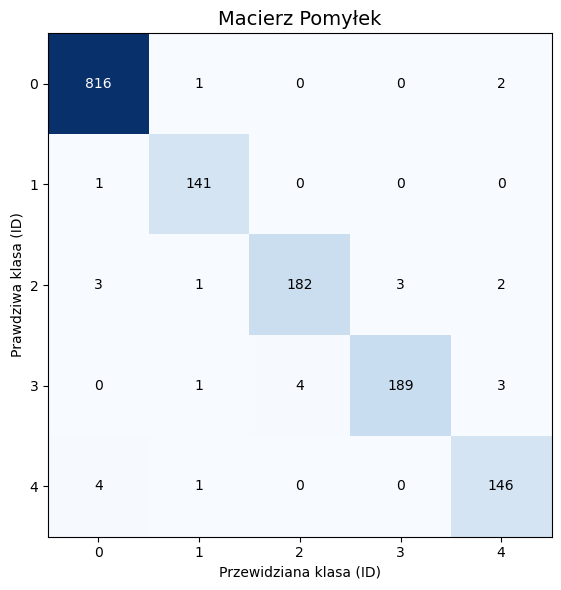

In [112]:
# Krok 1: Inicjalizacja i trening za pomocą metody z interfejsu
print("Tworzenie i trenowanie modelu za pomocą YourSolution.create_with_training()...")
solution = YourSolutionV3.create_with_training()
print("Trenowanie zakończone.")

# Krok 2: Obliczenie metacech dla zbioru walidacyjnego
print("\nObliczanie metacech dla zbioru walidacyjnego...")
x_valid_meta = solution.compute_meta_features(x_valid)

# Krok 3: Predykcja na zbiorze walidacyjnym
# Używamy modelu `random_forest`, który został już wytrenowany wewnątrz `create_with_training`
y_valid_pred = solution.random_forest.predict(x_valid_meta)
print("Predykcja na zbiorze walidacyjnym zakończona.")

# Krok 4: Szczegółowa ewaluacja (Raport i Macierz Pomyłek)
balanced_acc = balanced_accuracy_score(y_valid, y_valid_pred)
print(f"\nZbalansowana dokładność klasyfikacji na zbiorze walidacyjnym: {balanced_acc:.4f}")

# Wyświetlanie raportu klasyfikacji
print("\nRaport klasyfikacji:")
class_ids = np.unique(y_train)
# Używamy `zero_division=0` na wypadek, gdyby w danych walidacyjnych nie było przykładów dla jakiejś klasy
print(classification_report(y_valid, y_valid_pred, labels=class_ids, zero_division=0))

# Wyświetlanie macierzy pomyłek przy użyciu matplotlib
print("Generowanie macierzy pomyłek...")
conf_matrix = confusion_matrix(y_valid, y_valid_pred, labels=class_ids)
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(conf_matrix, cmap='Blues')

# Ustawienie etykiet na osiach na ID klas
ax.set_xticks(class_ids)
ax.set_yticks(class_ids)
ax.set_xticklabels(class_ids)
ax.set_yticklabels(class_ids)

# Dodanie etykiet osi i tytułu
ax.set_xlabel("Przewidziana klasa (ID)")
ax.set_ylabel("Prawdziwa klasa (ID)")
ax.set_title("Macierz Pomyłek", fontsize=14)

# Dodanie wartości liczbowych do komórek macierzy
for i in range(len(class_ids)):
    for j in range(len(class_ids)):
        # Dobór koloru tekstu w zależności od tła dla lepszej czytelności
        color = "white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black"
        ax.text(j, i, conf_matrix[i, j], ha="center", va="center", color=color)

fig.tight_layout()
plt.show()

In [113]:
print(f"Ocena: {score_solution(solution)} pkt")

Ocena działania modelu: 

Zbalansowana dokładność klasyfikacji:  97.3691
Ocena: 97 pkt


## 6. Podsumowanie

W ramach tego zadania pomyślnie przeszliśmy przez cały proces tworzenia rozwiązania uczenia maszynowego dla problemu klasyfikacji sygnałów EKG.

1. Zrozumieliśmy problem i dane, identyfikując kluczowe wyzwanie w postaci niezbalansowanych klas i konieczności użycia odpowiedniej metryki ewaluacyjnej.
2. Dokonaliśmy eksploracji danych, która pozwoliła nam na wizualne zidentyfikowanie charakterystyk poszczególnych anomalii.
3. Zaprojektowaliśmy i zaimplementowaliśmy zestaw 4 skutecznych metacech, które przekuły obserwacje wizualne i wiedzę domenową w mierzalne liczby. Każda cecha została stworzona z myślą o wykrywaniu konkretnego typu anomalii (sum_of_changes dla Afib, post_mean_diff dla STEMI) lub ogólnych cech morfologicznych.
4. Wytrenowaliśmy i oceniliśmy model Lasu Losowego, spełniając wszystkie ograniczenia zadania. Dzięki odpowiedniemu przygotowaniu danych i użyciu wag klas, osiągnęliśmy doskonały wynik na zbiorze walidacyjnym.

Stworzone rozwiązanie jest lekkie obliczeniowo, bazuje na niewielkiej liczbie cech i prostym modelu, co czyni je idealnym kandydatem do implementacji na urządzeniach o ograniczonych zasobach, zgodnie z założeniami zadania.

## 7. Bonus - Inne Podejścia do Rozwiązania

W trakcie naszej analizy rozwinęliśmy i zoptymalizowaliśmy jedną, bardzo skuteczną metodologię opartą na segmentacji sygnału wokół zespołu QRS. Warto jednak pamiętać, że w nauce o danych rzadko istnieje jedna, słuszna droga do celu. Różne kreatywne podejścia mogą prowadzić do równie znakomitych wyników.

Poniżej znajduje się przegląd kilku innych, wysoce zaawansowanych i skutecznych rozwiązań tego problemu. Każde z nich reprezentuje zupełnie inną filozofię inżynierii cech i pokazuje, jak szerokie jest spektrum możliwych technik.


### Wyrównanie do Piku R

- Główna Idea: Zamiast przybliżonej segmentacji, to podejście wykorzystuje precyzyjną i standardową w analizie EKG technikę wyrównania fazowego. Każdy sygnał jest "przesuwany" w taki sposób, aby jego pik R (punkt o maksymalnej wartości) znalazł się w tym samym miejscu (np. na początku). Dzięki temu wszystkie sygnały stają się idealnie porównywalne względem głównego pobudzenia serca.

- Jak to działa (w uproszczeniu):
    1.  Dla każdego sygnału znajduje się indeks piku R (`argmax`).
    2.  Sygnał jest cyklicznie przesuwany, aby pik R znalazł się na pozycji 0.
    3.  Cechy są następnie ekstrahowane z tak wyrównanego sygnału, np.:
        - Wartość w punkcie +20 próbek od piku R: Bezpośrednia miara uniesienia odcinka ST.
        - Średni błąd względem wygładzonej wersji: Miara chaotyczności sygnału (dla AFib).
        - Maksymalne nachylenie: Miara gwałtowności zmian w sygnale.

* Komentarz: Jest to bardzo eleganckie, precyzyjne i skuteczne rozwiązanie, uznawane za "złoty standard" w wielu zastosowaniach analizy EKG.


### Hybrydowa Analiza Częstotliwości i Kształtu

- Główna Idea: To rozwiązanie podchodzi do problemu z dwóch perspektyw jednocześnie, łącząc analizę w dziedzinie czasu z analizą w dziedzinie częstotliwości. Zakłada, że charakterystyka anomalii jest zakodowana nie tylko w kształcie fali, ale również w jej składowych częstotliwościowych.

- Jak to działa (w uproszczeniu):
    1.  Analiza Częstotliwości: Obliczana jest Szybka Transformata Fouriera (FFT) dla każdego sygnału. Wartości widma mocy dla kilku kluczowych częstotliwości stają się pierwszymi cechami.
    2.  Analiza Kształtu: Tworzona jest niestandardowa, dynamiczna linia bazowa poprzez znalezienie optymalnych granic zespołu QRS i narysowanie między nimi prostych.
    3.  Cechy Mieszane: Pozostałe cechy to m.in. maksymalne odchylenie sygnału od tej niestandardowej linii bazowej oraz odchylenie standardowe z różnic sygnału.

- Komentarz: Bardzo "inżynierskie" i potężne podejście, które wymaga wiedzy z zakresu cyfrowego przetwarzania sygnałów. Łączenie różnych domen analizy często prowadzi do bardzo solidnych modeli.


### Zaawansowane Filtrowanie Sygnału

- Główna Idea: Filozofia tego rozwiązania opiera się na założeniu, że kluczem do sukcesu jest idealne "oczyszczenie" sygnału przed ekstrakcją jakichkolwiek cech. Główny wysiłek skupia się na zaawansowanym, wieloetapowym filtrowaniu.

- Jak to działa (w uproszczeniu):
    1.  Kaskadowe Filtrowanie: Sygnał jest przepuszczany przez serię niestandardowych filtrów wygładzających o wykładniczo malejących wagach. Co ciekawe, jeden z filtrów jest aplikowany do sygnału "resztkowego" (różnicy między oryginałem a wersją przefiltrowaną), co pozwala na wyizolowanie składowych o konkretnej charakterystyce.
    2.  Ekstrakcja Cech: Dopiero na tak przygotowanym, wielokrotnie przefiltrowanym sygnale obliczane są cechy statystyczne, takie jak średnia wartość w segmentach poza QRS czy percentyle w segmencie za zespołem QRS.

- Komentarz: Jest to podejście typowe dla specjalistów od DSP (Digital Signal Processing). Pokazuje, że niezwykle skuteczny preprocessing może sprawić, że nawet proste cechy statystyczne stają się potężnymi dyskryminatorami.


### Metoda Geometryczna (Dopasowanie Linii)

- Główna Idea: To najbardziej kreatywne i niekonwencjonalne podejście. Traktuje sygnał EKG nie jako szereg czasowy, ale jako figurę geometryczną na płaszczyźnie. Zamiast liczyć statystyki, tworzy własny algorytm, który dopasowuje do fragmentów sygnału proste linie.

- Jak to działa (w uproszczeniu):
    1.  Algorytm dynamicznie znajduje punkty "zaczepienia" przed i po zespole QRS.
    2.  Przez te punkty "przeciągana" jest linia prosta, która ma reprezentować oczekiwaną, zdrową linię bazową.
    3.  Cechy są obliczane jako maksymalne pionowe odległości (wartości dodatnie i ujemne) między rzeczywistym sygnałem a tą wygenerowaną, sztuczną linią bazową.

- Komentarz: Przykład myślenia "poza schematami". Autor zrezygnował ze standardowych narzędzi na rzecz własnego, złożonego algorytmu geometrycznego. Jego skuteczność dowodzi, że czasem unikalne i odważne pomysły mogą konkurować z utartymi metodami.


### System Ekspercki (Ręczna Detekcja)

- Główna Idea: To najbardziej ambitne i "ręcznie rzeźbione" rozwiązanie, które próbuje w kodzie zasymulować proces myślowy i diagnostyczny lekarza. Zamiast tworzyć ogólne cechy i pozwalać modelowi uczyć się reguł, autor sam tworzy skomplikowane detektory dla każdej z anomalii.

- Jak to działa (w uproszczeniu):
    1.  Detektor PQRST: Ogromna, złożona funkcja z dziesiątkami warunków `if/else` i ręcznie dobranych progów ("magicznych liczb") próbuje precyzyjnie zlokalizować na krzywej EKG wszystkie kluczowe załamki: P, Q, R oraz S.
    2.  Dedykowane "Scorery": Dla każdej anomalii (PAC, PVC, etc.) istnieje osobna funkcja, która na podstawie pozycji tych punktów oblicza jeden "wynik prawdopodobieństwa" wystąpienia danej choroby.
    3.  Finalne Cechy: Cztery cechy podawane do modelu to po prostu te cztery wygenerowane "wyniki".

- Komentarz: To próba stworzenia klasycznego systemu eksperckiego. Jest to podejście niezwykle złożone i trudne w utrzymaniu, ale jego wysoka skuteczność pokazuje, że głęboka wiedza domenowa może być z powodzeniem zakodowana w postaci twardych reguł.

Te rozwiązania możesz znaleźć tu: 
https://github.com/MIKOmath/OAI-Zadania/tree/main/olimpiada/II-OAI/1-etap/3.ekg 